In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['id=1000c0', 'id=1000c1', 'id=1001c0', 'id=1001c1', 'id=1002c0', 'id=1002c1', 'id=1003c0', 'id=1003c1', 'id=1004c0', 'id=1004c1', 'id=1005c0', 'id=1005c1'](12#)


c obj_y_pred_c  obj_y_pred_p
ZTF20aayprqz   SLSN         SNIa      0.384584
ZTF20aaoxbju  SNII*         SLSN      0.357481
ZTF18acrhehl  SNII*         SNIa      0.342176
ZTF19aazfvhh  SNII*         SLSN      0.395698
ZTF18acuqskr  SNII*         SNIa      0.346688
...             ...          ...           ...
ZTF20abbplei  SNIbc         SNIa      0.336296
ZTF19aapwnmb  SNIbc         SNIa      0.423908
ZTF19achiyvy  SNIbc        SNII*      0.283807
ZTF19acftclq  SNIbc        SNII*      0.290571
ZTF18abqbuaj  SNIbc         SNIa      0.421037

[103 rows x 3 columns]

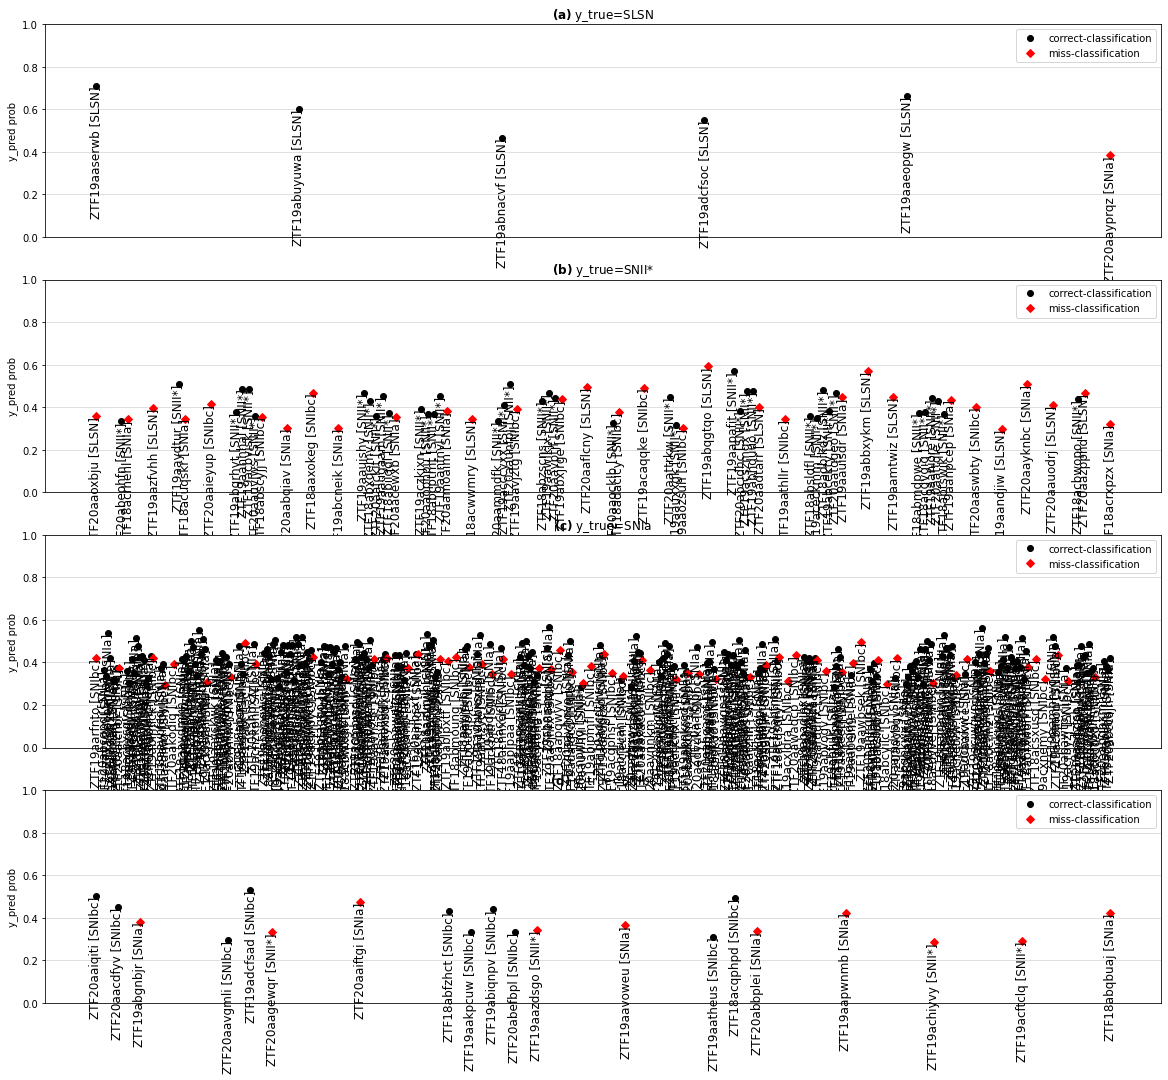

In [28]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.files as ftfiles
from fuzzytools.datascience import misclassifications
import matplotlib.pyplot as plt

set_name = 'test'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '4'
mode = 'all'
train_config = 'r'

load_roodir = f'../save/exp=rf_eval~train_config={train_config}~mode={mode}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
files, files_ids, kfs = ftfiles.gather_files_by_kfold(load_roodir, kf, set_name,
    fext='d',
    imbalanced_kf_mode='ignore', # error oversampling
    )
print(f'{files_ids}({len(files_ids)}#)')

file_idx = 0
file = files[file_idx]
thdays = file()['thdays']
thday = thdays[-1]
days_predictions = file()['thdays_predictions'][thday]
y_pred_p = days_predictions['y_pred_p']
y_true = days_predictions['y_true']
class_names = file()['class_names']
obj_ids = file()['lcobj_names']

fig, axs, brf_miss_objs_df = misclassifications.plot_misclassification_map(y_pred_p, y_true, class_names,
    obj_ids=obj_ids,
    #pred_prob_th=0, # None .5
    fontsize=12,
    figsize=(20,18),
    legend_loc='upper right',
    #verbose=1,
    also_show_correct_objs_txt=True,
    )
display(brf_miss_objs_df)
plt.show()

In [29]:
txt = ''
brf_miss_obj_ids = []
for miss_obj_id in list(brf_miss_objs_df.index):
    txt += f"'{miss_obj_id}', "
    brf_miss_obj_ids += [miss_obj_id]
print(f'brf_miss_obj_ids = [{txt}]')

brf_miss_obj_ids = ['ZTF20aayprqz', 'ZTF20aaoxbju', 'ZTF18acrhehl', 'ZTF19aazfvhh', 'ZTF18acuqskr', 'ZTF20aaieyup', 'ZTF18abscyjj', 'ZTF20aabqiav', 'ZTF18aaxokeg', 'ZTF19abcneik', 'ZTF20aacewxb', 'ZTF20aamoaim', 'ZTF18acwwmry', 'ZTF19aavjztg', 'ZTF19abxjrge', 'ZTF20aaflcny', 'ZTF18adacicy', 'ZTF19acaqqke', 'ZTF19aaozsuh', 'ZTF19abqgtqo', 'ZTF20aadtarr', 'ZTF19aathllr', 'ZTF19aauisdr', 'ZTF19abbxykm', 'ZTF19aamtwiz', 'ZTF19aanpcep', 'ZTF20aaswbty', 'ZTF19aandjiw', 'ZTF20aayknbc', 'ZTF20aauodrj', 'ZTF20aazpphd', 'ZTF18acrxpzx', 'ZTF19aarfnto', 'ZTF20aaichor', 'ZTF19abimlck', 'ZTF19aazdiwq', 'ZTF20aakodiq', 'ZTF19ackjsys', 'ZTF20abfyriw', 'ZTF19abcttsc', 'ZTF19acnzkph', 'ZTF19achjpyc', 'ZTF18acbwxgn', 'ZTF19aavhzsc', 'ZTF19aakyxsq', 'ZTF18acsxpmp', 'ZTF19ackjmge', 'ZTF18abjvzxx', 'ZTF19ablpxtf', 'ZTF18abmoung', 'ZTF19aboudfp', 'ZTF19aaulzvc', 'ZTF19ackbjtf', 'ZTF18acnnxor', 'ZTF19aaplpaa', 'ZTF19acyfoha', 'ZTF19aaojnrx', 'ZTF18aapqwyv', 'ZTF19adajqcq', 'ZTF20aauwhyi', 'ZTF19abipmfl', 'ZTF

In [30]:
deep_miss_obj_ids = ['ZTF20aayprqz', 'ZTF20aaoxbju', 'ZTF20abeohfn', 'ZTF18acrhehl', 'ZTF18acuqskr', 'ZTF20aaieyup', 'ZTF20aabqiav', 'ZTF18aaxokeg', 'ZTF18abiiqdl', 'ZTF20aacewxb', 'ZTF20aammdfk', 'ZTF19aavjztg', 'ZTF19abxjrge', 'ZTF20aaflcny', 'ZTF19acaqqke', 'ZTF19aaozsuh', 'ZTF20aadtarr', 'ZTF19aathllr', 'ZTF18adbikdz', 'ZTF19aauisdr', 'ZTF19abbxykm', 'ZTF18abtswjk', 'ZTF19aanpcep', 'ZTF19aandjiw', 'ZTF20aayknbc', 'ZTF18acrxpzx', 'ZTF20aayxcyn', 'ZTF19acygjgx', 'ZTF19ackjsys', 'ZTF20abfyriw', 'ZTF19acjerzj', 'ZTF19acbtlkz', 'ZTF19acjnatv', 'ZTF18absliyc', 'ZTF19acmblbi', 'ZTF19aakyxsq', 'ZTF19ablpxtf', 'ZTF19aboudfp', 'ZTF19aaulzvc', 'ZTF20aatpqps', 'ZTF18aapqwyv', 'ZTF19abipmfl', 'ZTF19acgphsf', 'ZTF18accjecm', 'ZTF19acrichx', 'ZTF20aadyukn', 'ZTF18ablqkud', 'ZTF20aafcjln', 'ZTF20aawadcp', 'ZTF19aardunx', 'ZTF19aaxeetj', 'ZTF19aapeime', 'ZTF19aawbsek', 'ZTF18abilofa', 'ZTF20aabqkla', 'ZTF18abcyilc', 'ZTF18acdvvej', 'ZTF19aazxcvl', 'ZTF19achetvw', 'ZTF20aaivjce', 'ZTF19acjtkha', 'ZTF19acxnemy', 'ZTF20abcxnkh', 'ZTF18acbudzo', 'ZTF19abgnbjr', 'ZTF20aavgmli', 'ZTF20aaiftgi', 'ZTF19aapwnmb', 'ZTF19acftclq', 'ZTF18abqbuaj', ]


In [31]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.progress_bars import ProgressBar
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset:
[outliers; samples 4]
(.) obs_samples=289; min_len=14; max_dur=408.0[days]; dur(p50)=222.1[days]; cadence(p50)=0.9[days]
(g) obs_samples=144; min_len=6; tmax=44.923828125; max_dur=408.0 [days]; dur(p50)=222.0 [days]; cadence(p50)=1.9 [days]
(r) obs_samples=145; min_len=8; tmax=212.09375; max_dur=376.0 [days]; dur(p50)=220.4 [days]; cadence(p50)=2.0 [days]
   |██      | SLSN - 1/4 (25.00%)
   |████    | SNII* - 2/4 (50.00%)
   |██      | SNIa - 1/4 (25.00%)
   |        | SNIbc - 0/4 (0.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint; samples 0]
empty lcset
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw; samples 1,994]
(.) obs_samples=54,685; min_len=6; max_dur=538.8[days]; dur(p50)=52.9[days]; cadence(p50)=1.0[days]
(g) obs_samples=24,132; min_len=0; tmax=10.99609375;

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
#obs=31.
#obs=43.
ZTF20aavnnkm


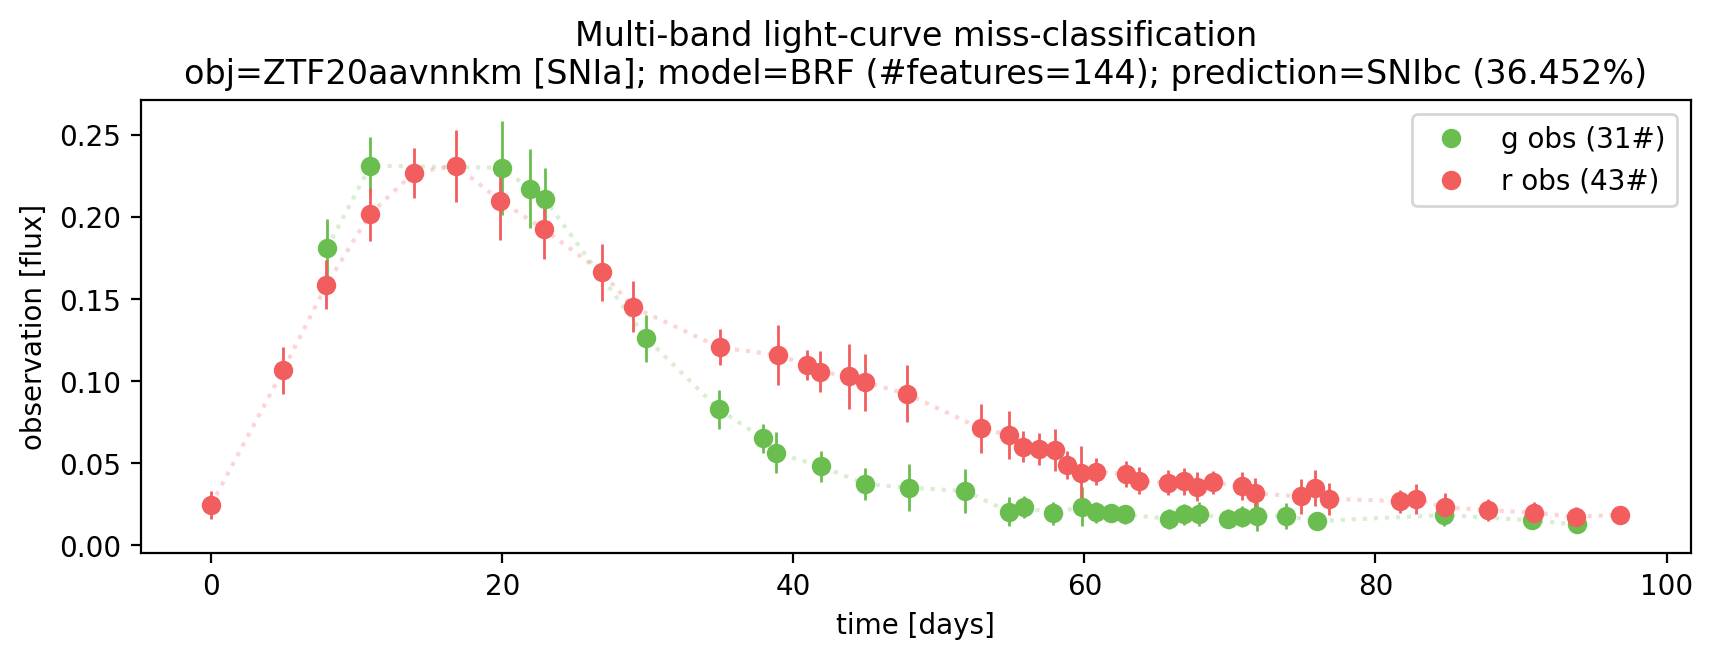

#obs=9.
#obs=8.
ZTF19abcneik


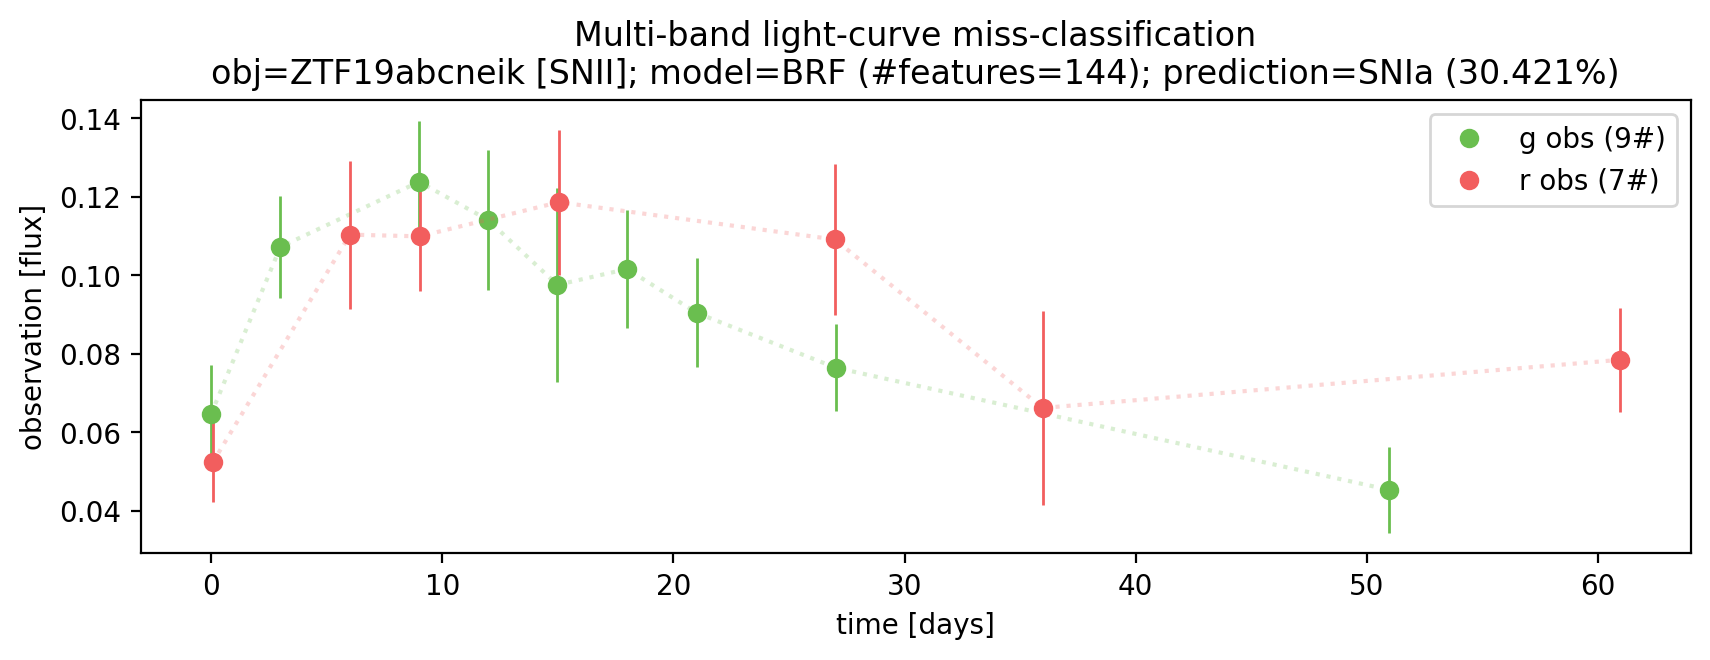

#obs=3.
#obs=19.
ZTF20aaswbty


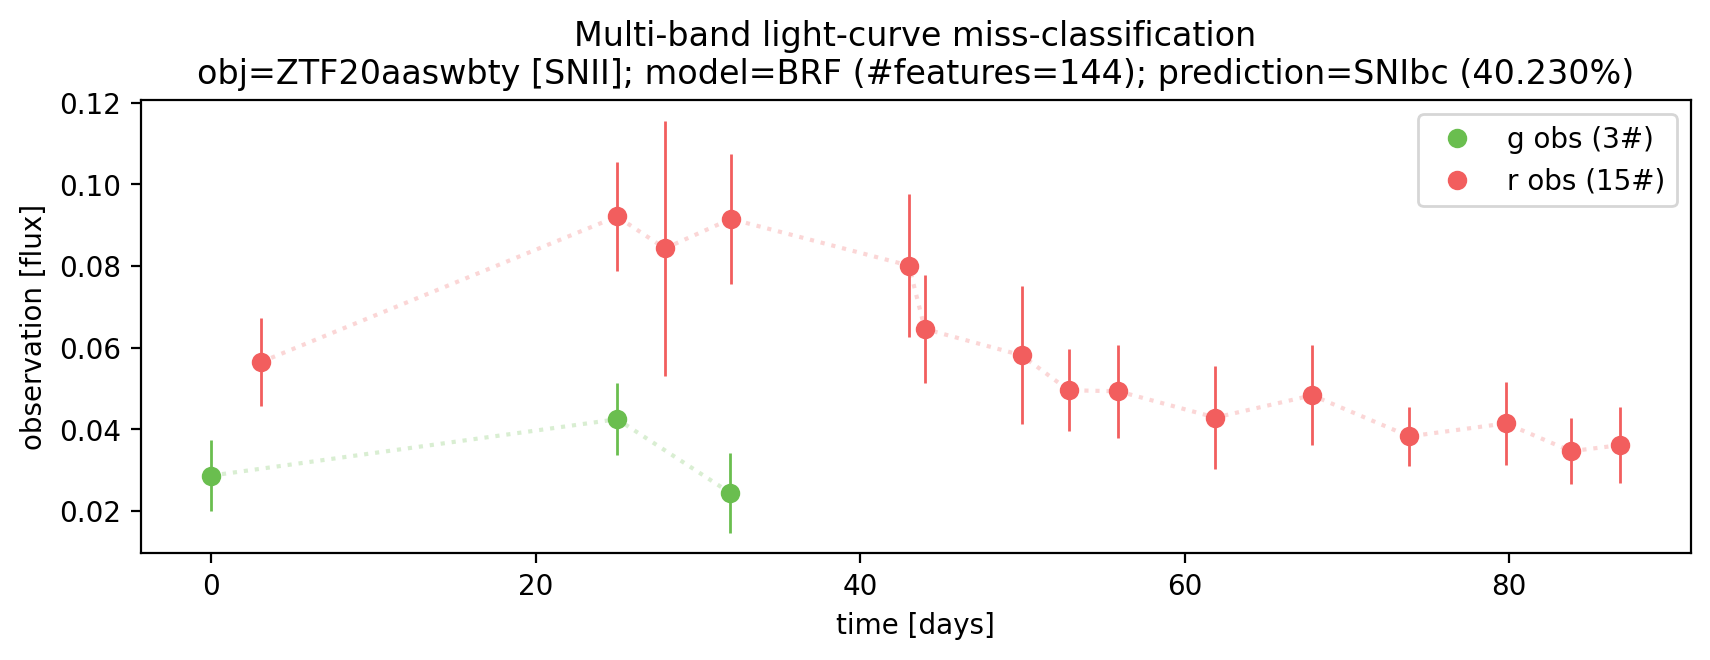

#obs=4.
#obs=8.
ZTF18acsxpmp


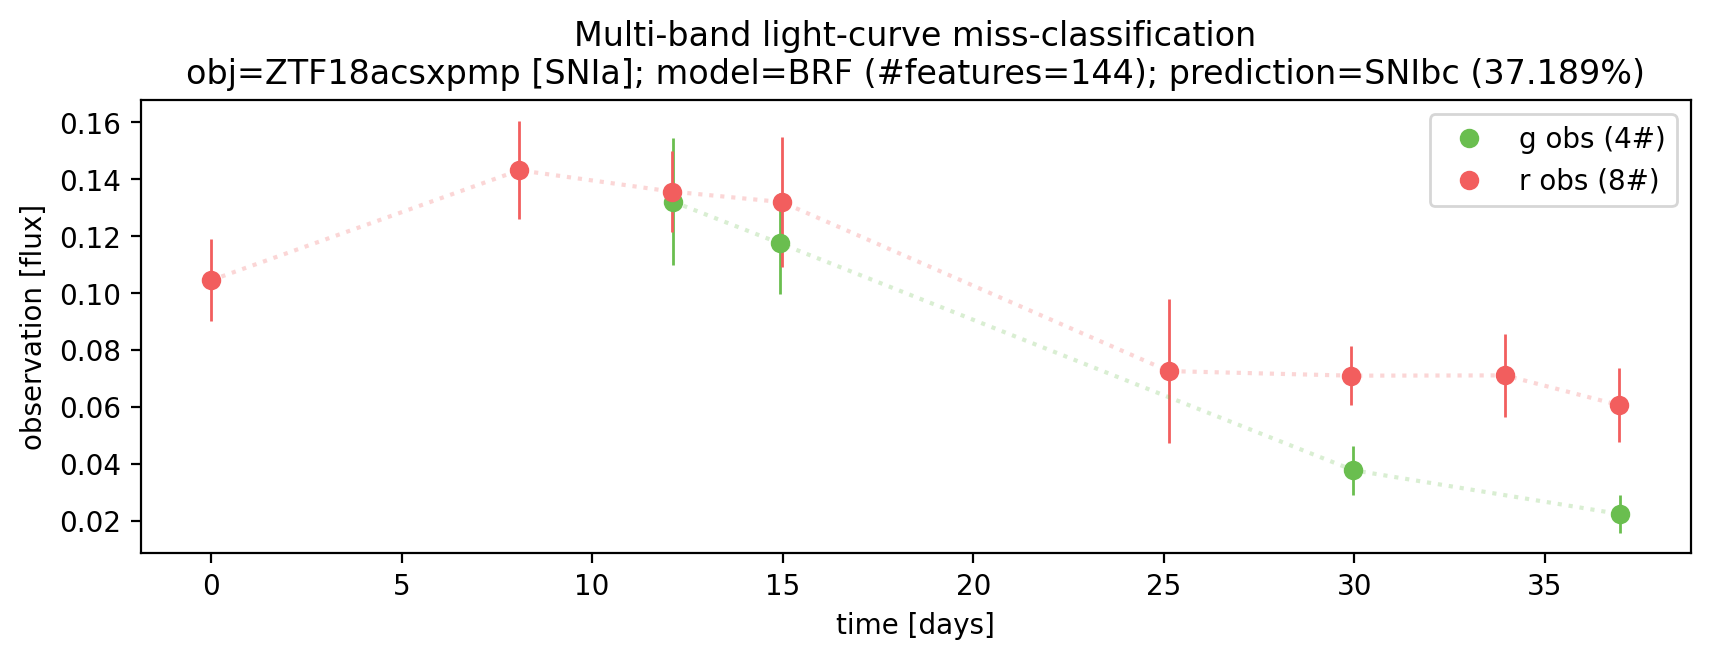

#obs=16.
#obs=28.
ZTF19adcdgca


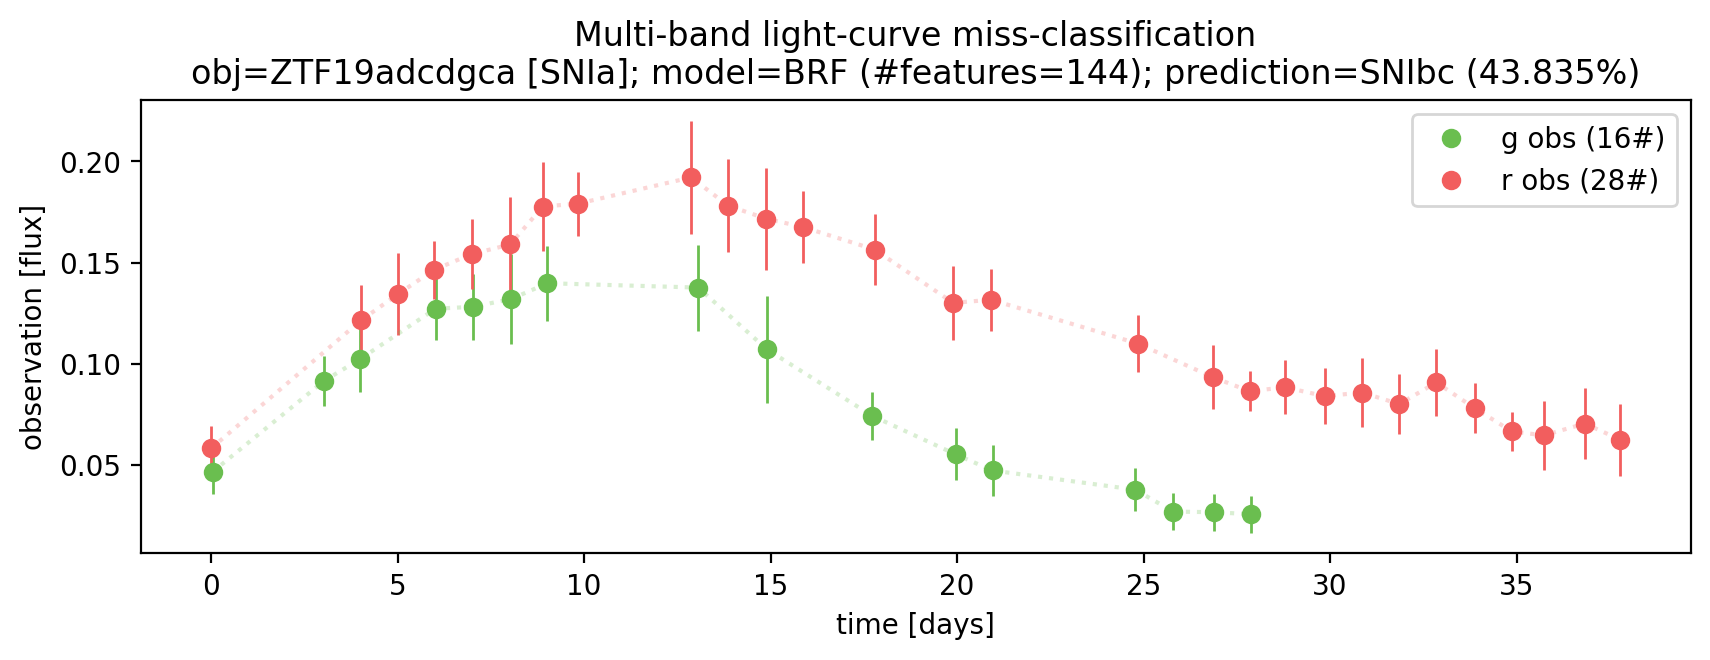

#obs=3.
#obs=9.
ZTF18acnnxor


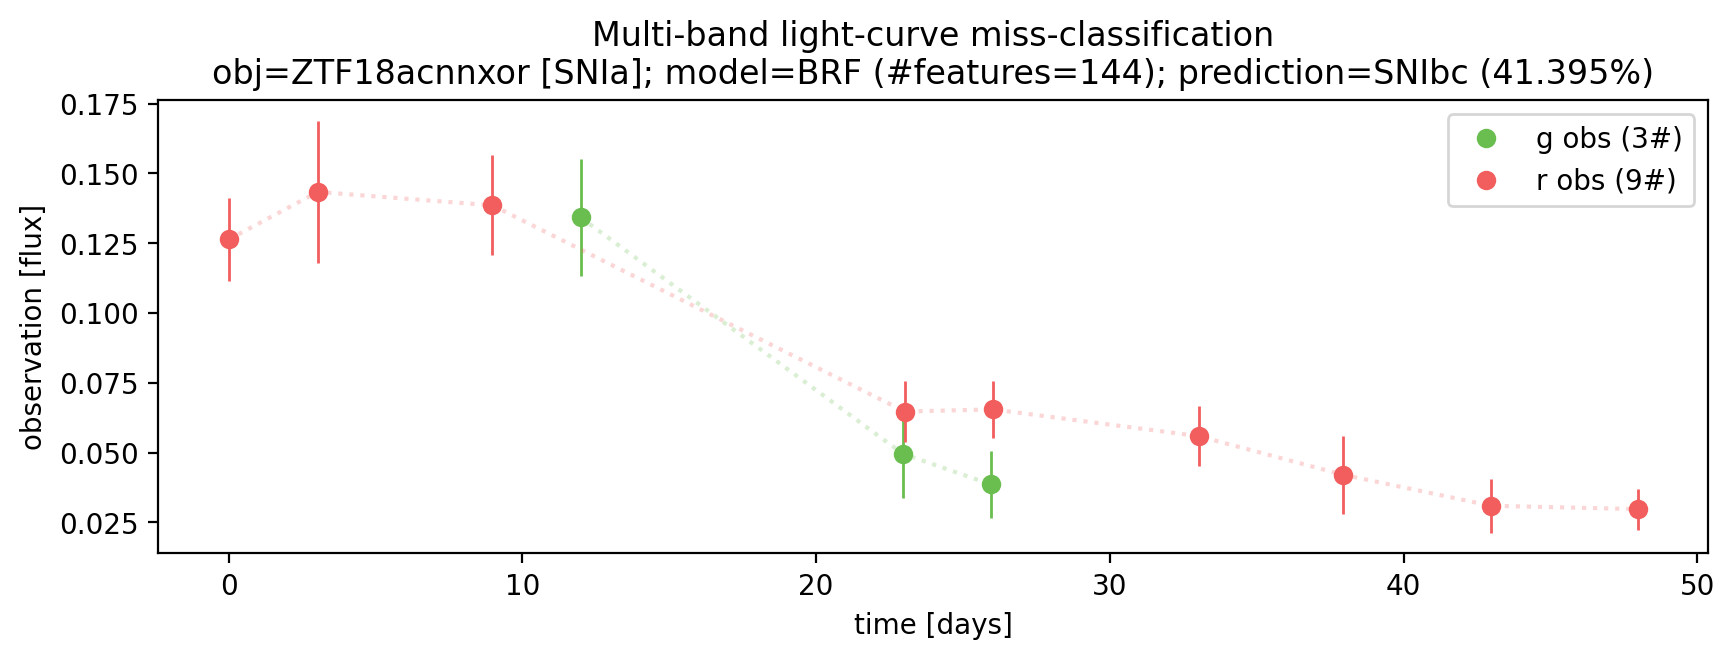

#obs=4.
#obs=10.
ZTF19ackjmge


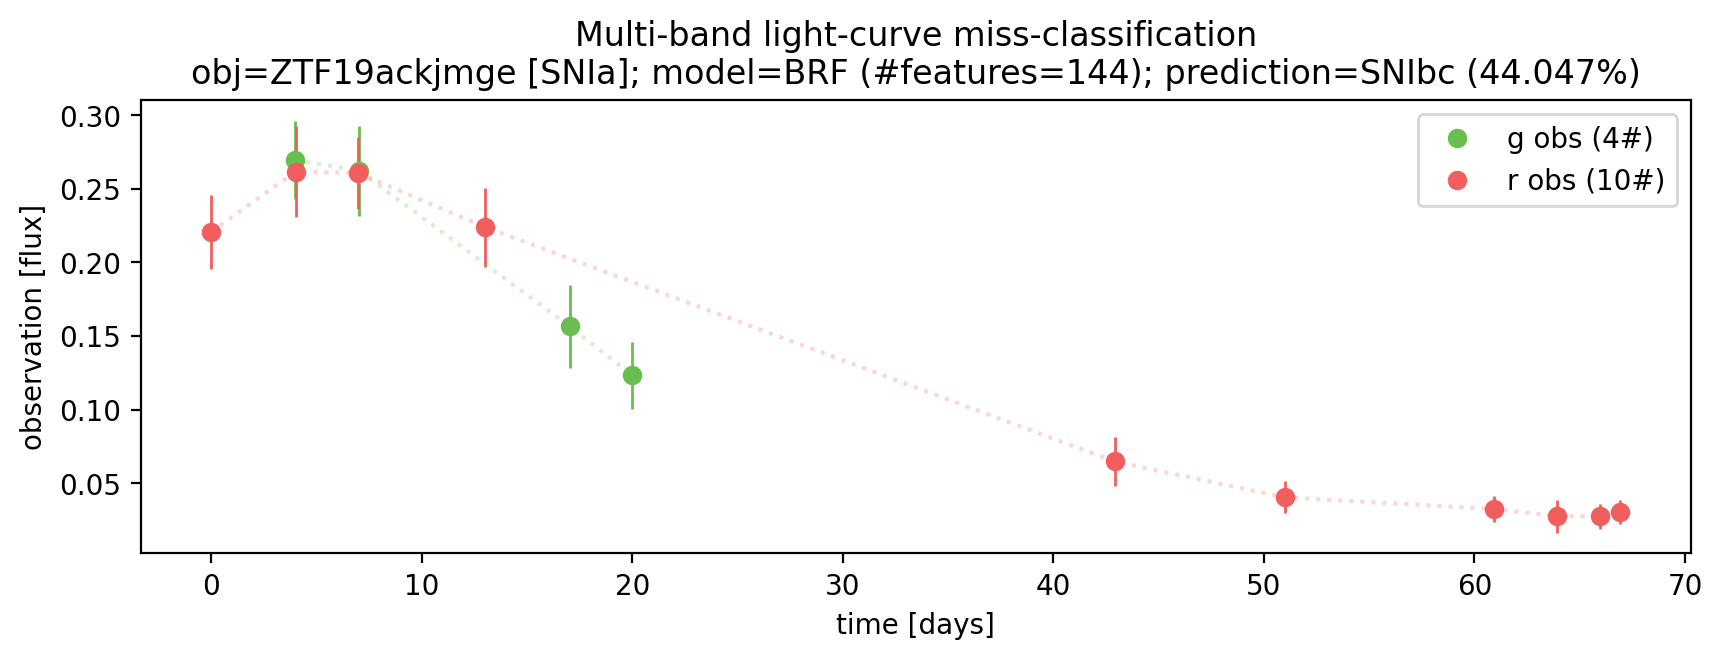

#obs=22.
#obs=31.
ZTF19aazfvhh


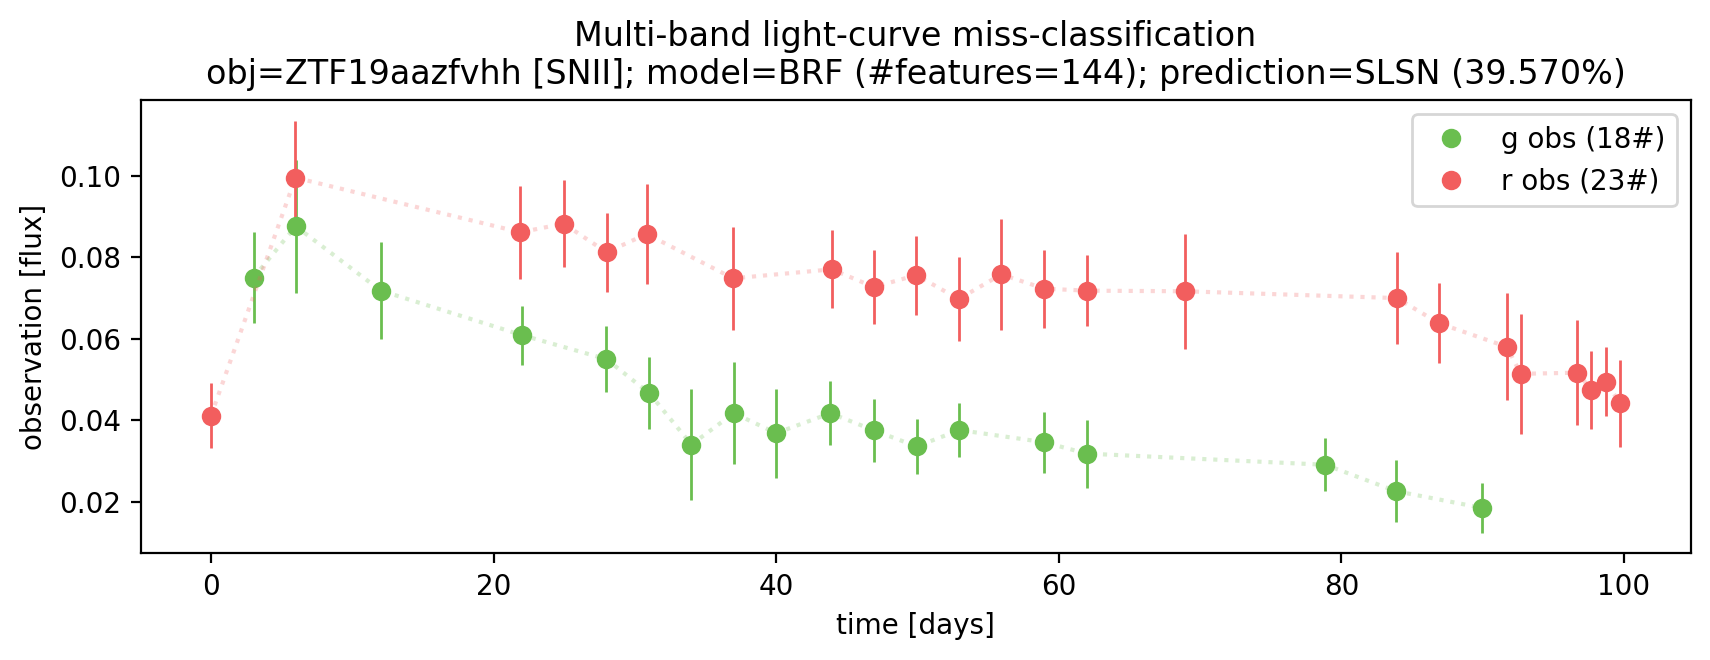

#obs=18.
#obs=19.
ZTF20aaichor


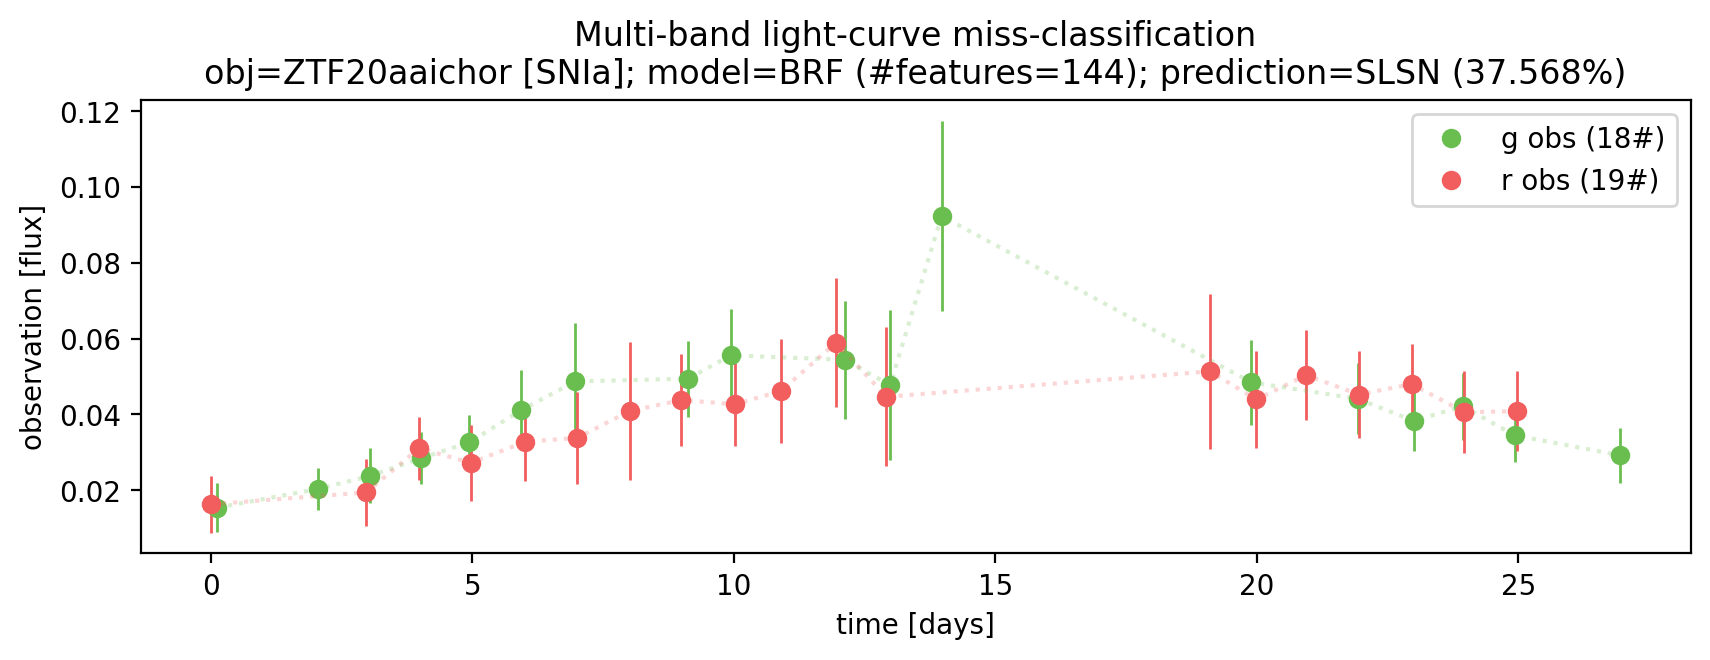

#obs=37.
#obs=31.
ZTF20abbplei


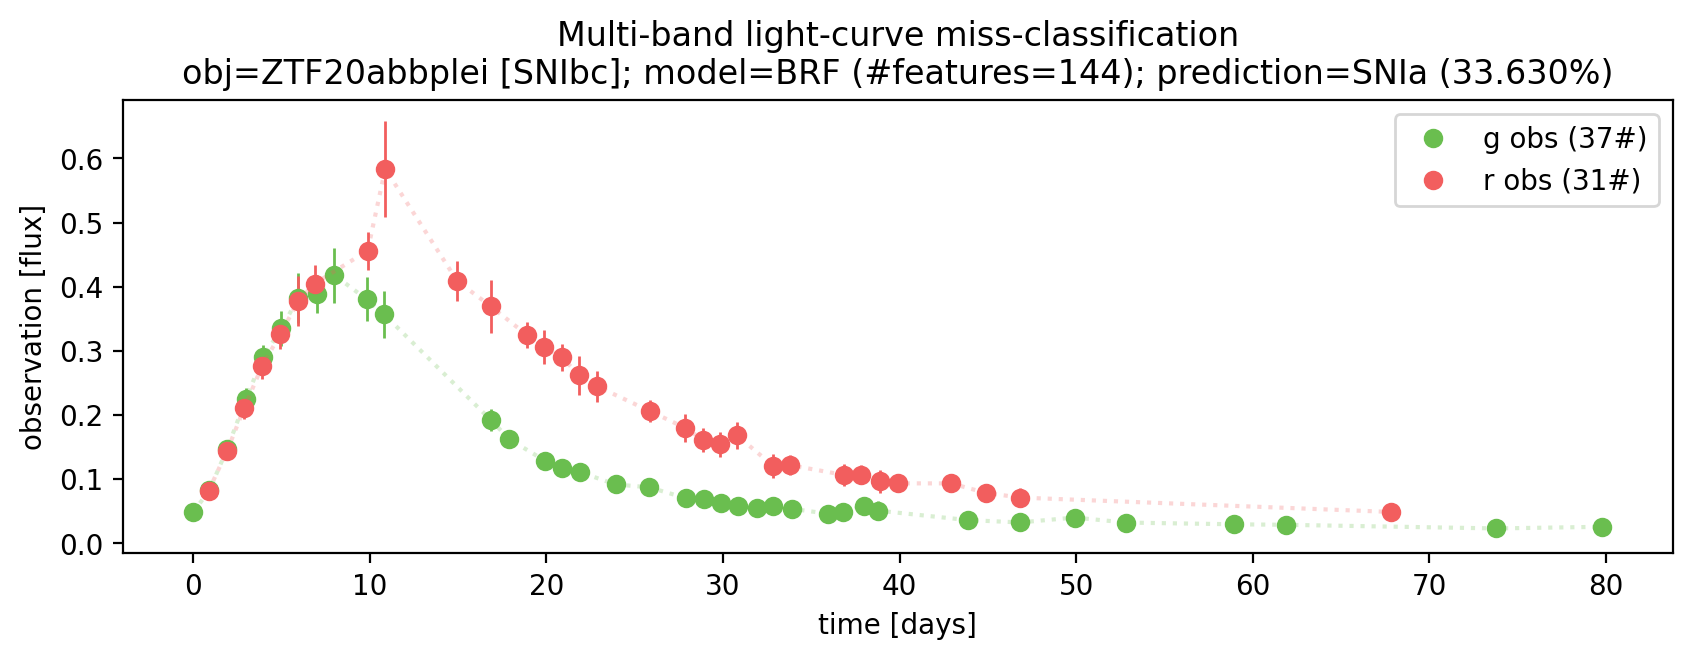

#obs=5.
#obs=10.
ZTF18abrxwon


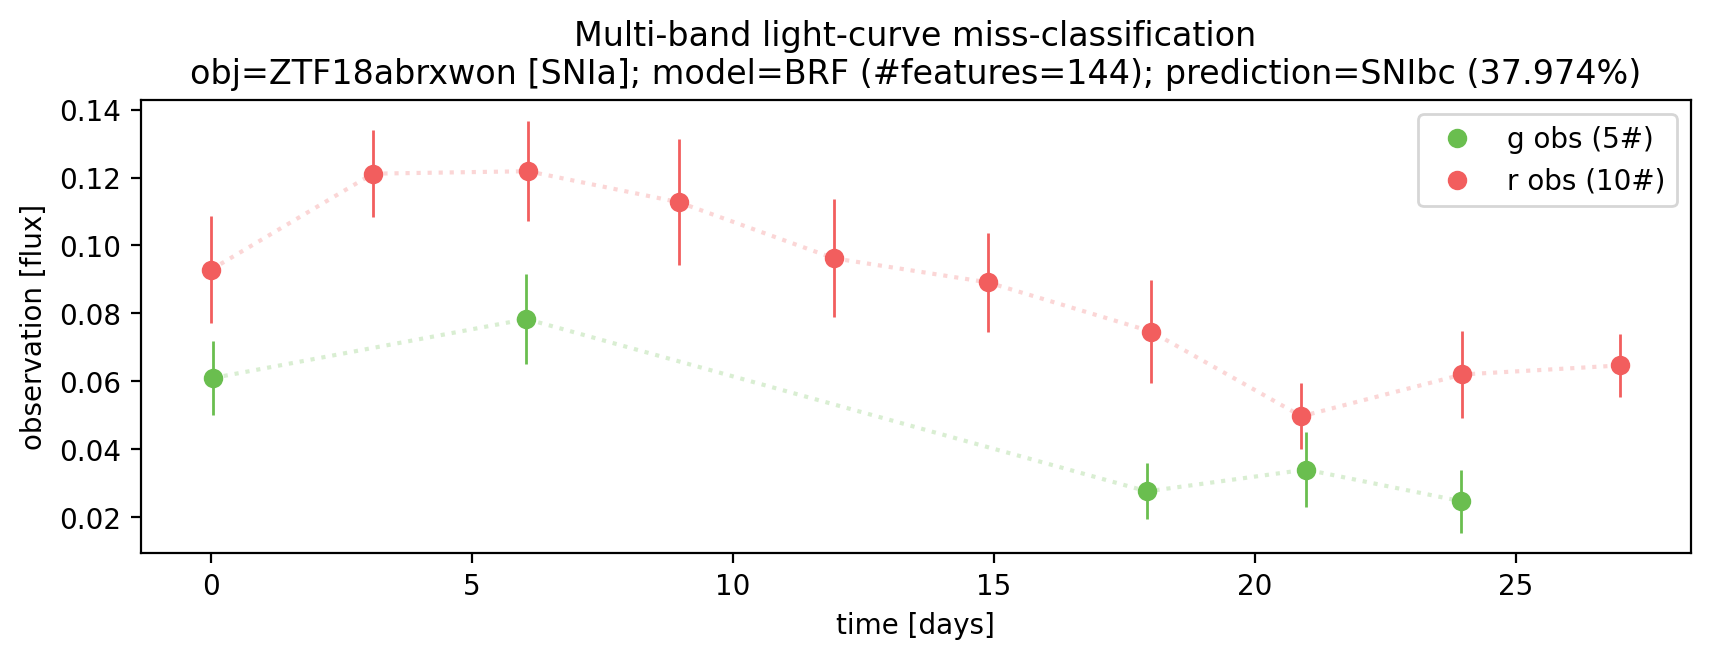

#obs=6.
#obs=8.
ZTF18acwwmry


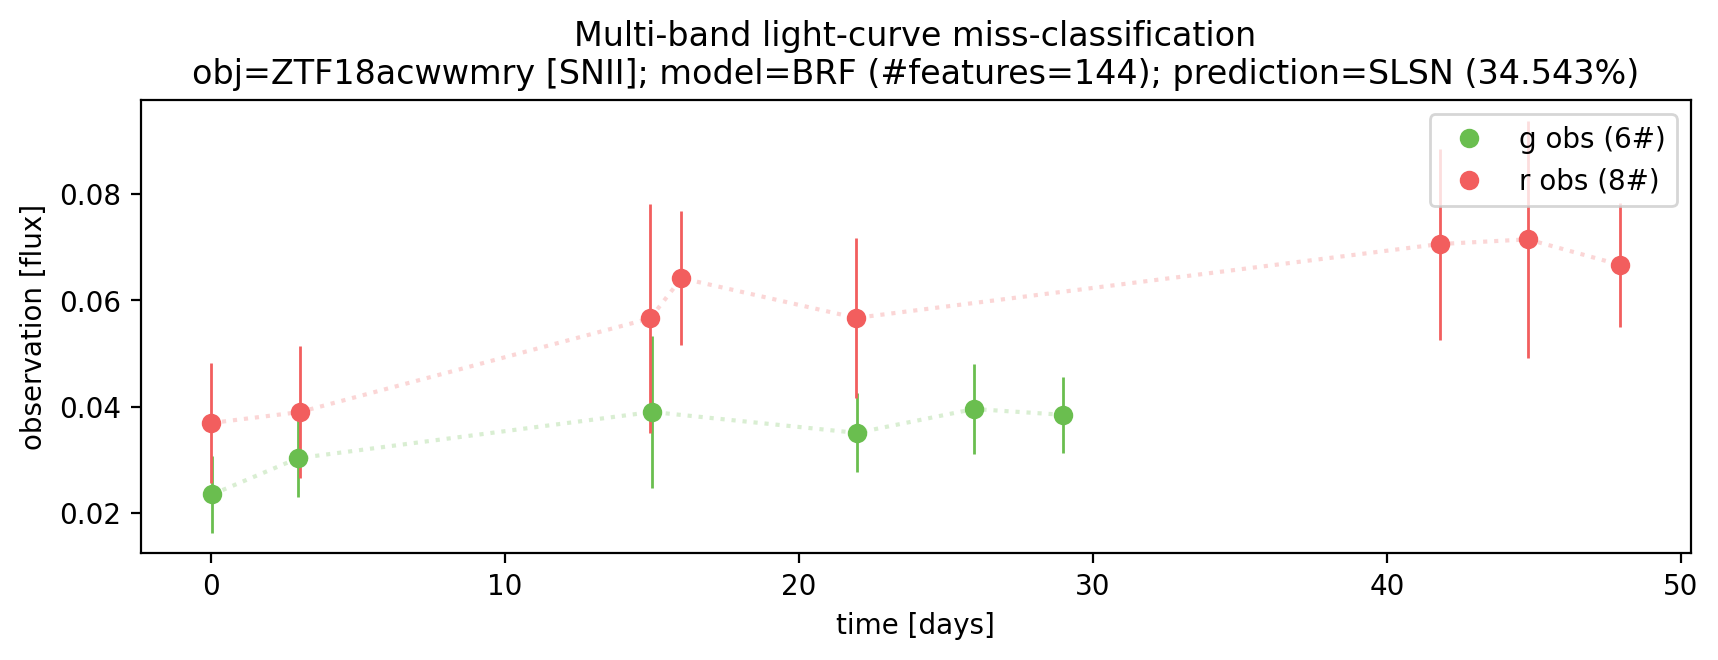

#obs=9.
#obs=26.
ZTF20aauodrj


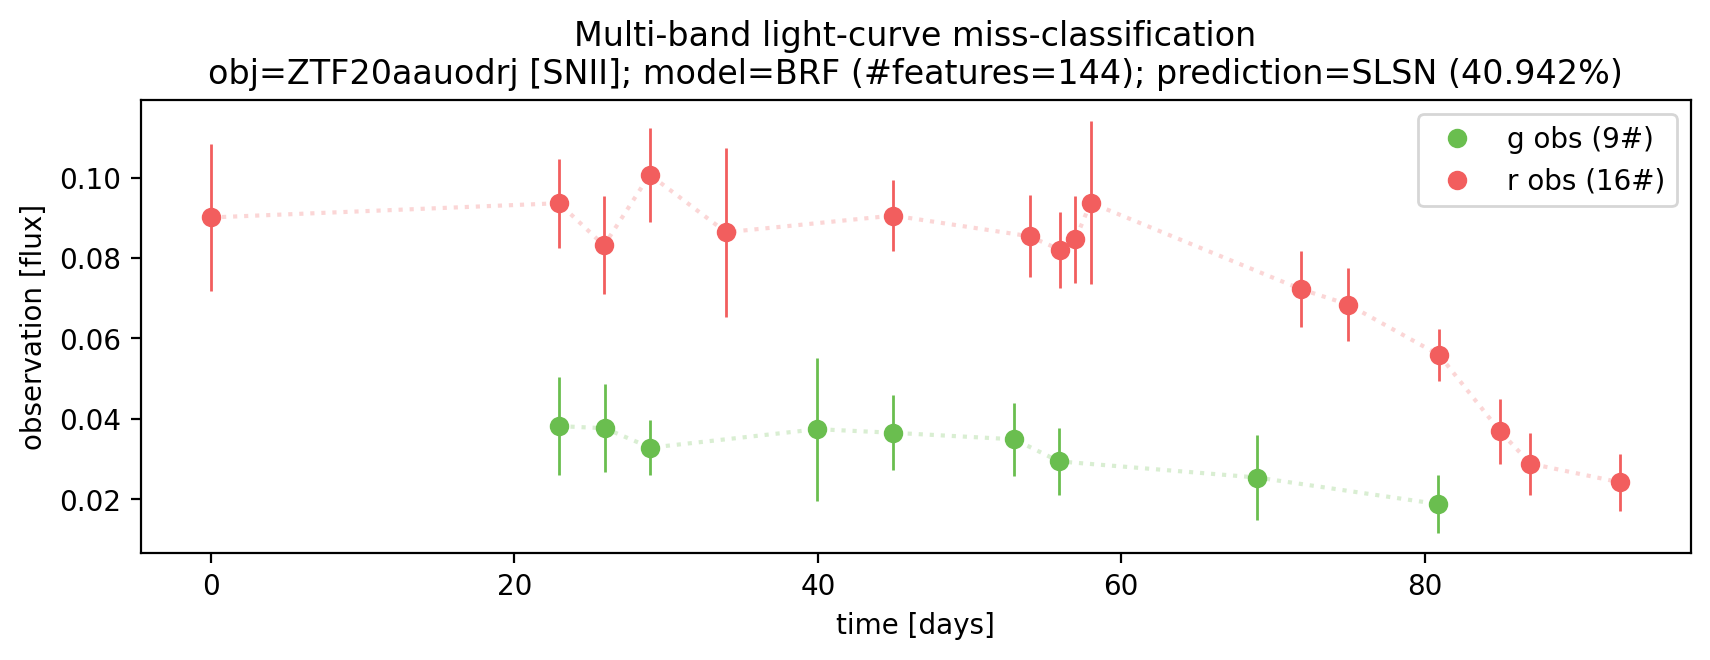

#obs=11.
#obs=13.
ZTF19aazdiwq


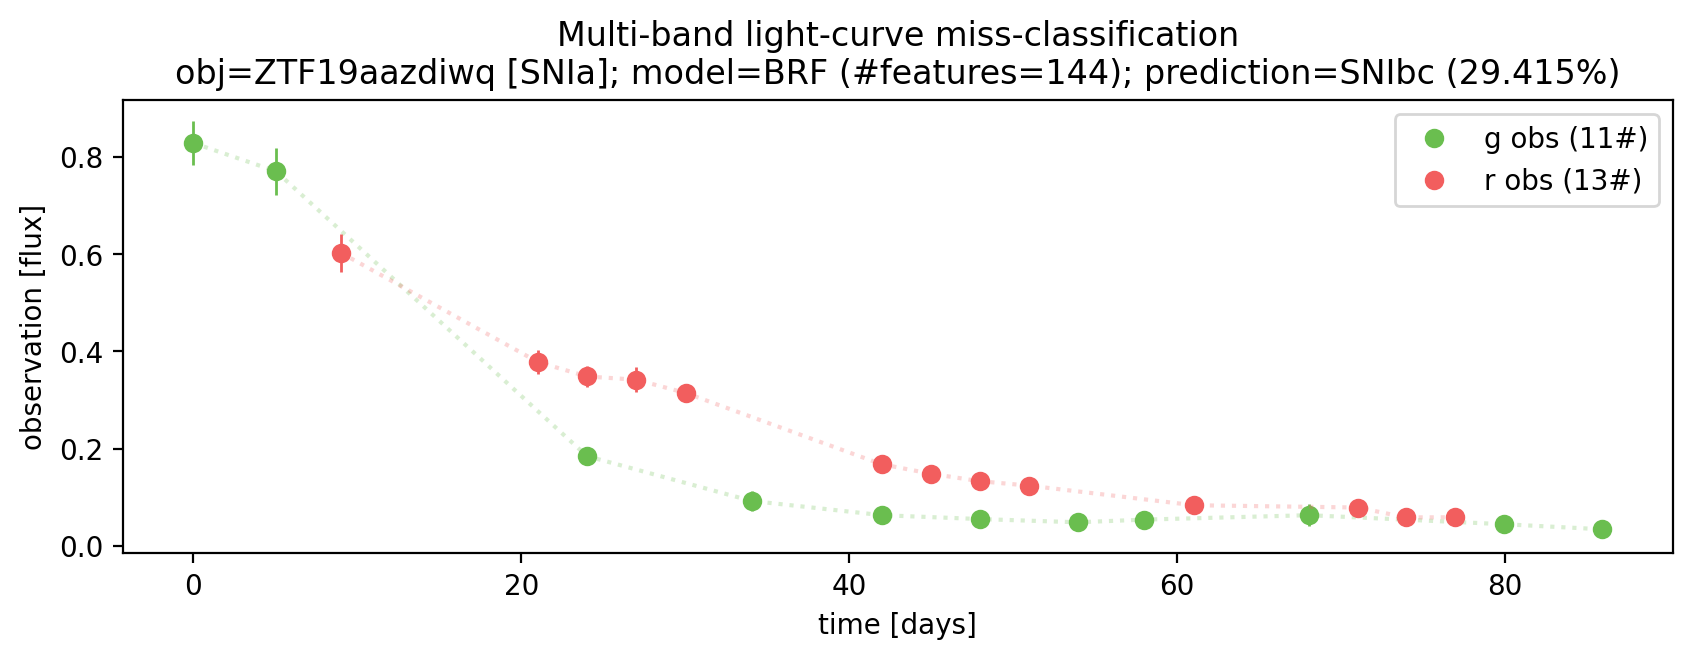

#obs=4.
#obs=6.
ZTF19ackbjtf


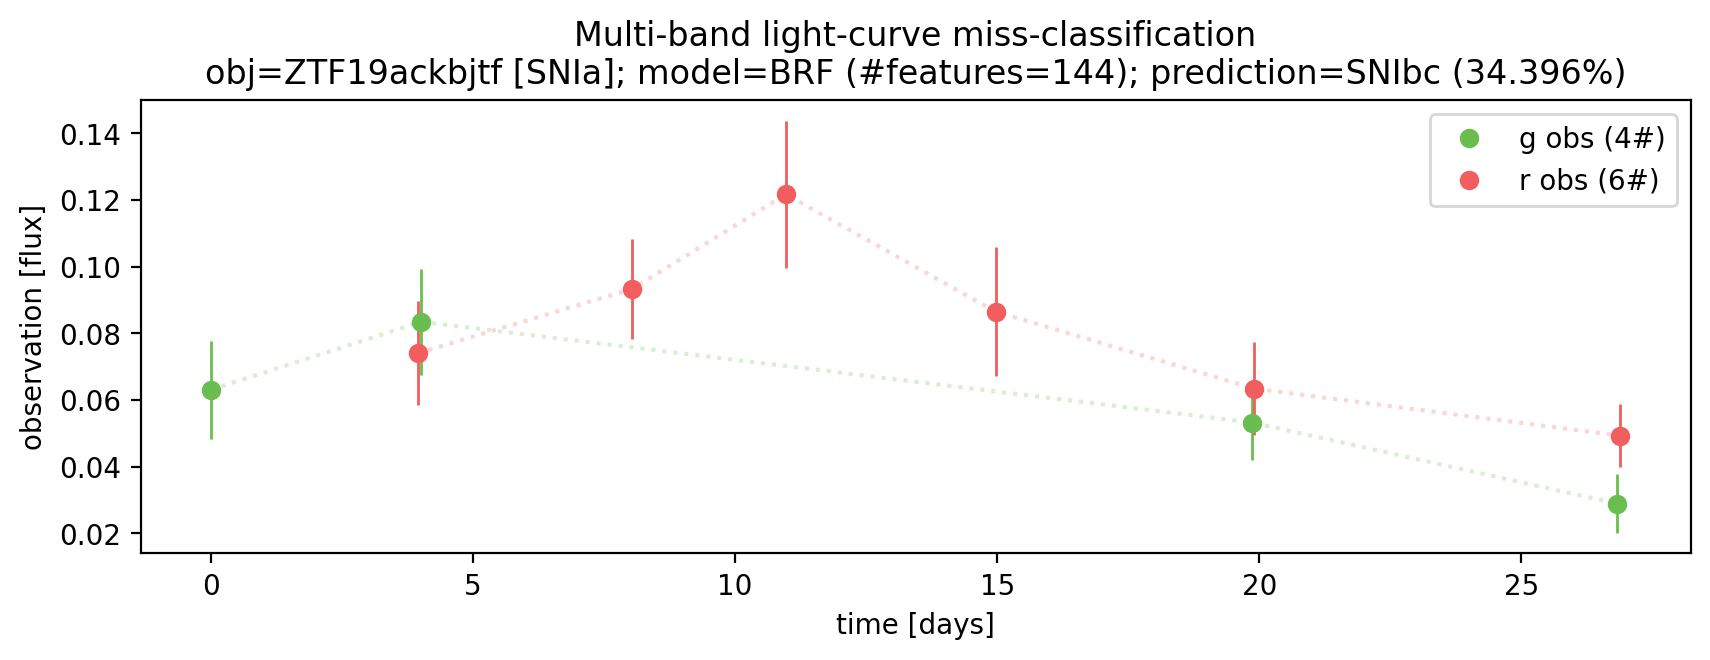

#obs=3.
#obs=6.
ZTF20aacbgvj


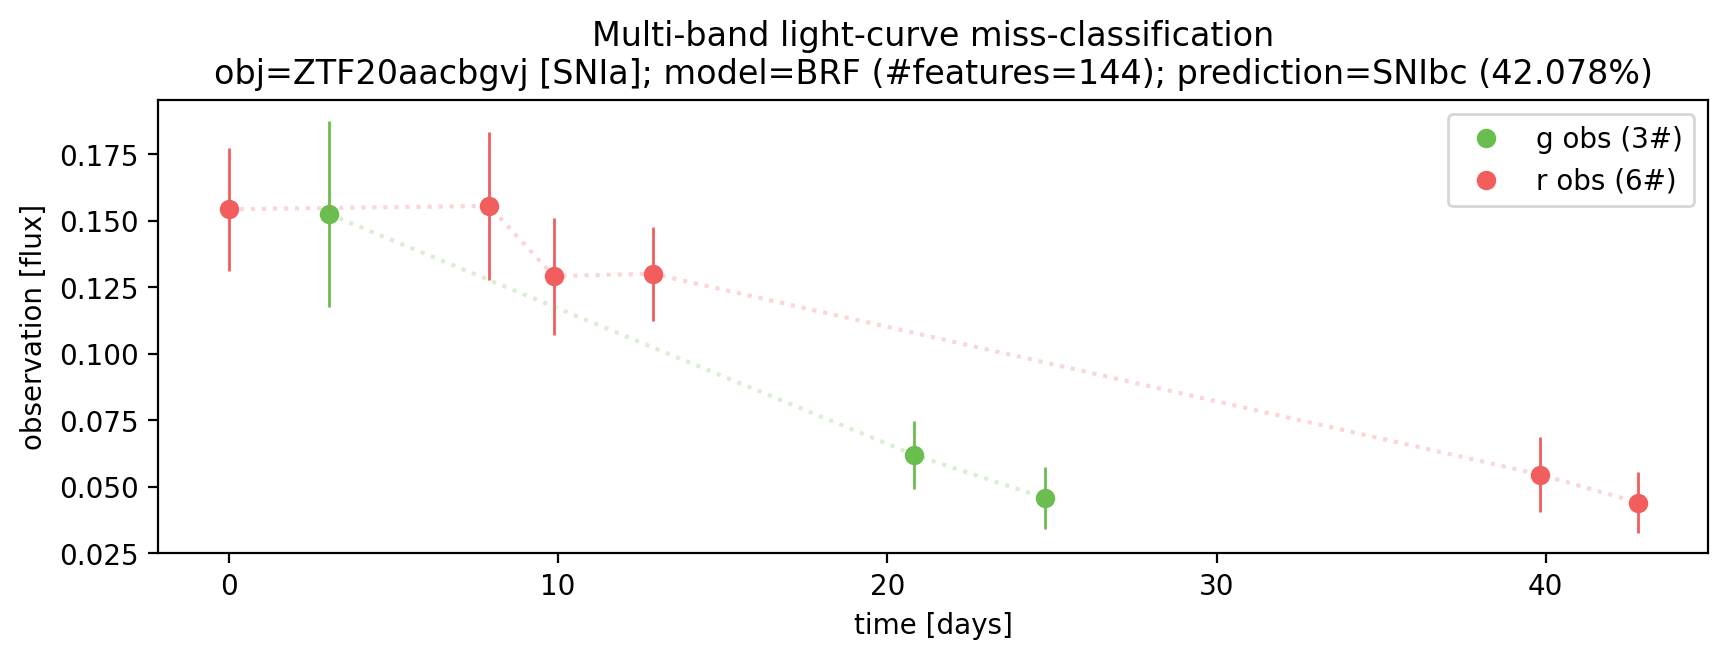

#obs=3.
#obs=8.
ZTF20ababkom


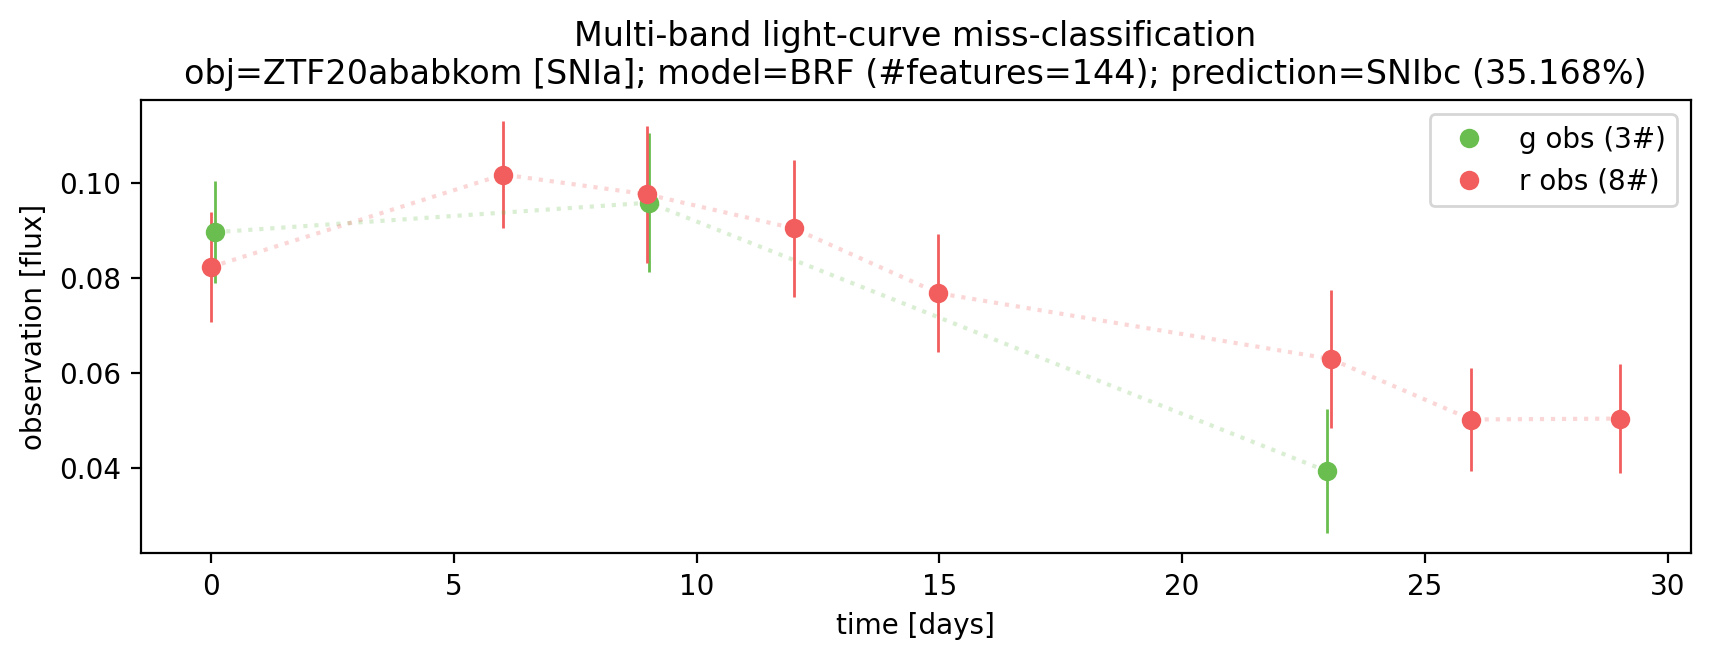

#obs=21.
#obs=38.
ZTF19abimlck


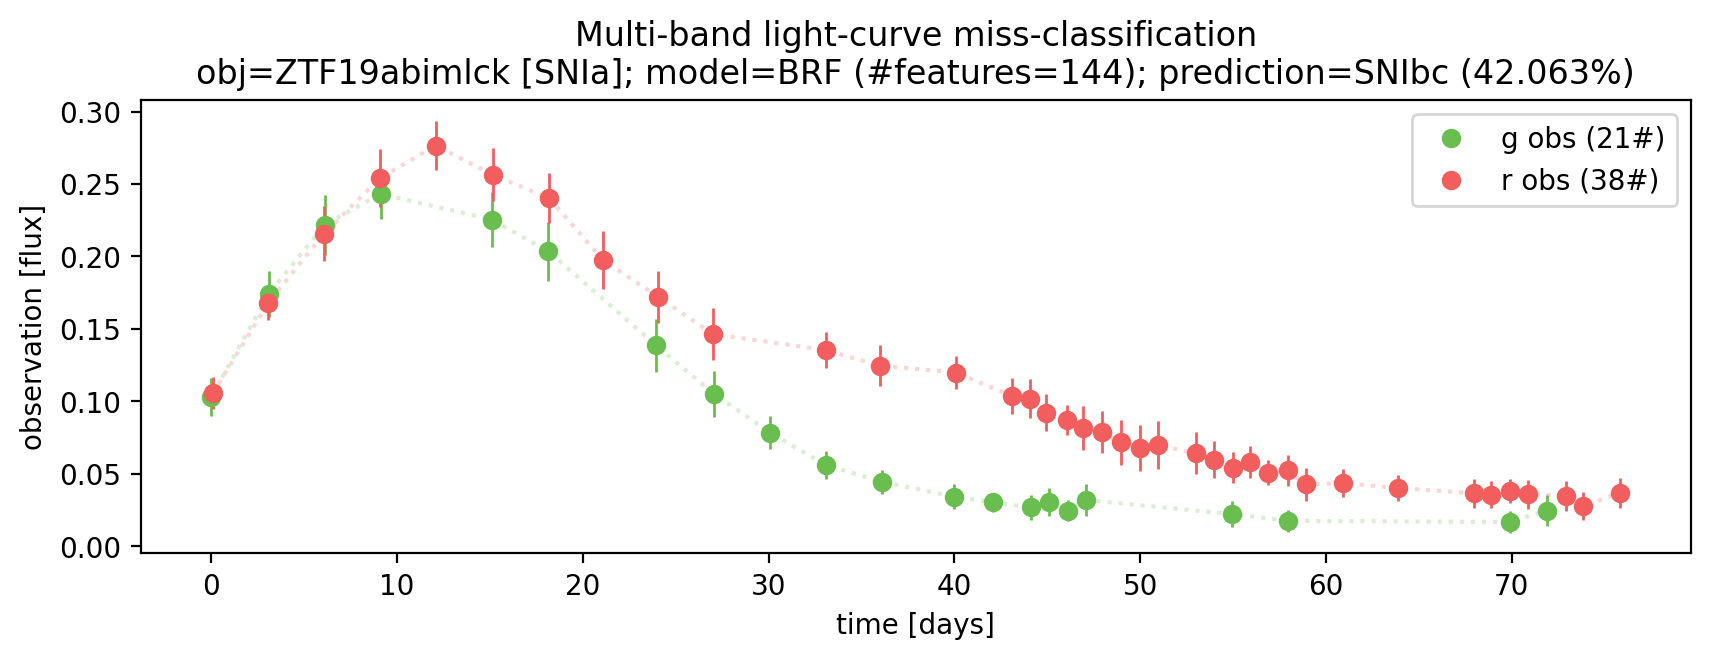

#obs=11.
#obs=18.
ZTF20aauwhyi


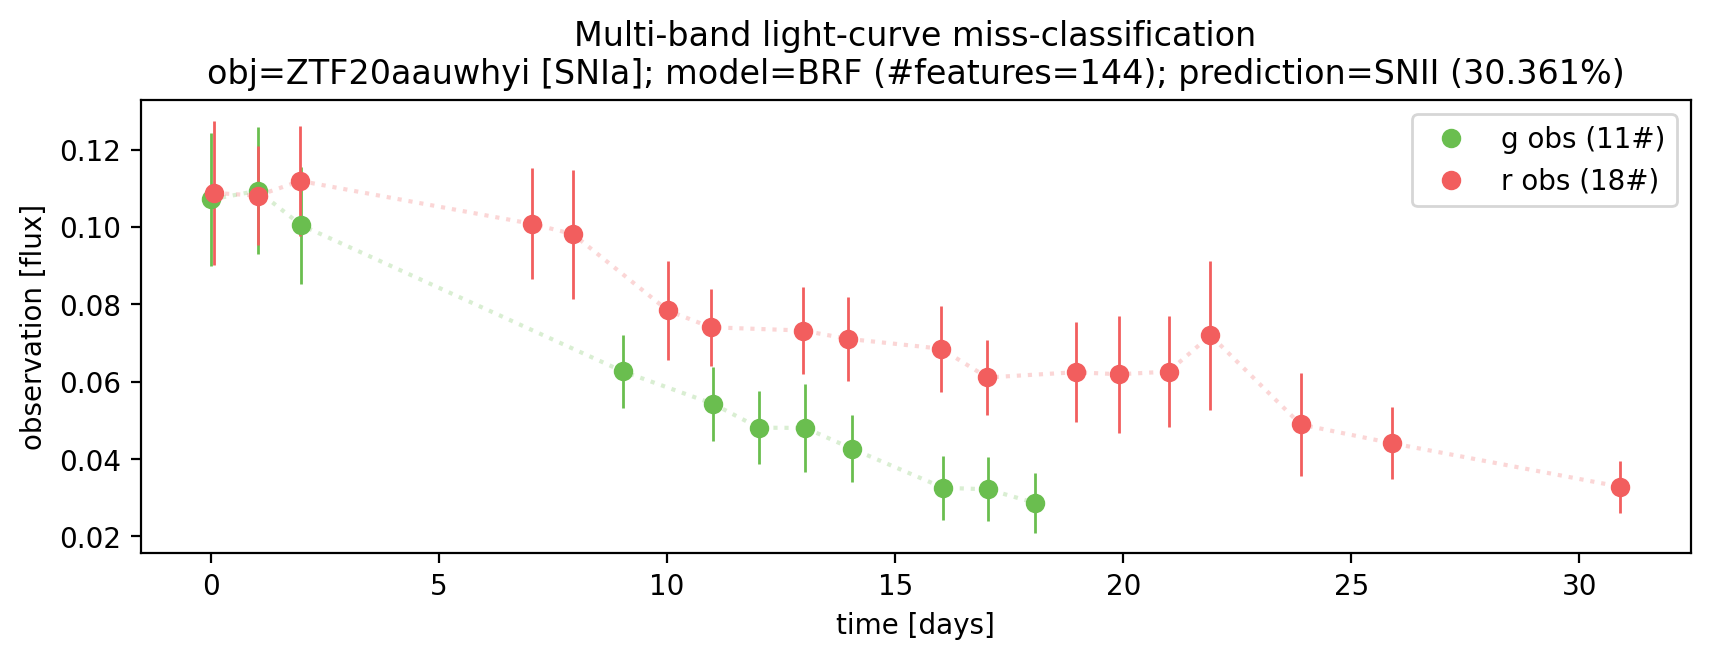

#obs=4.
#obs=7.
ZTF19aapvogv


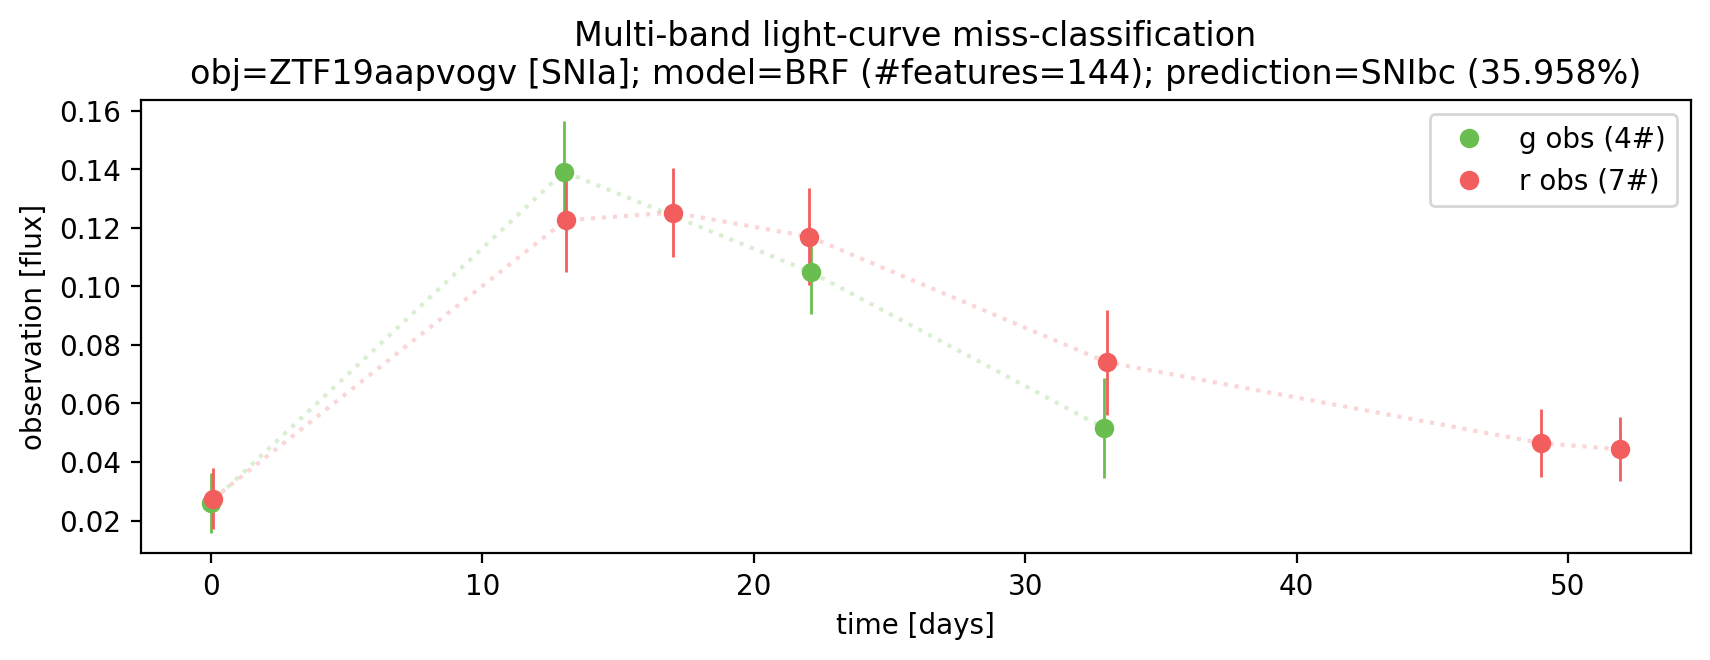

#obs=4.
#obs=7.
ZTF19achjpyc


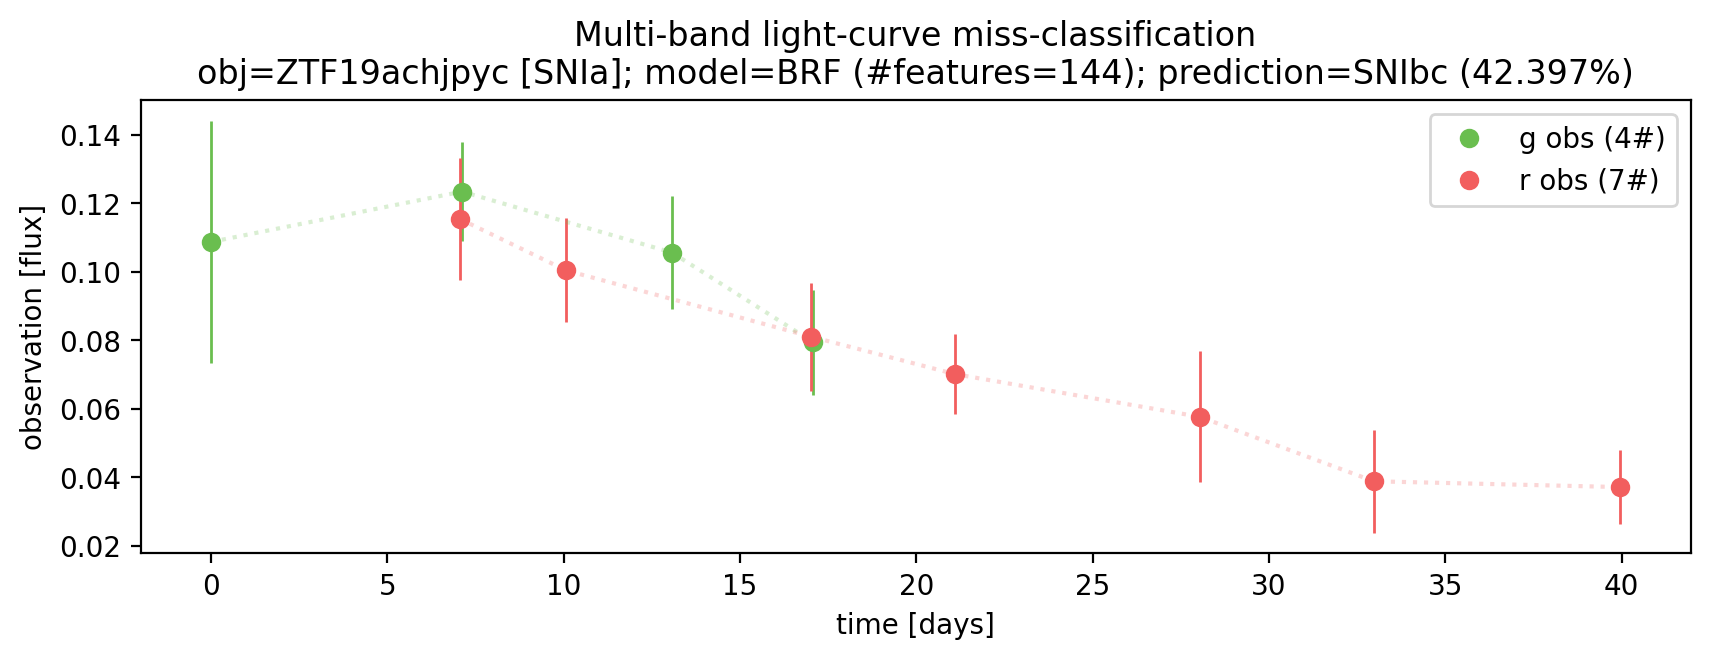

#obs=5.
#obs=6.
ZTF18adacicy


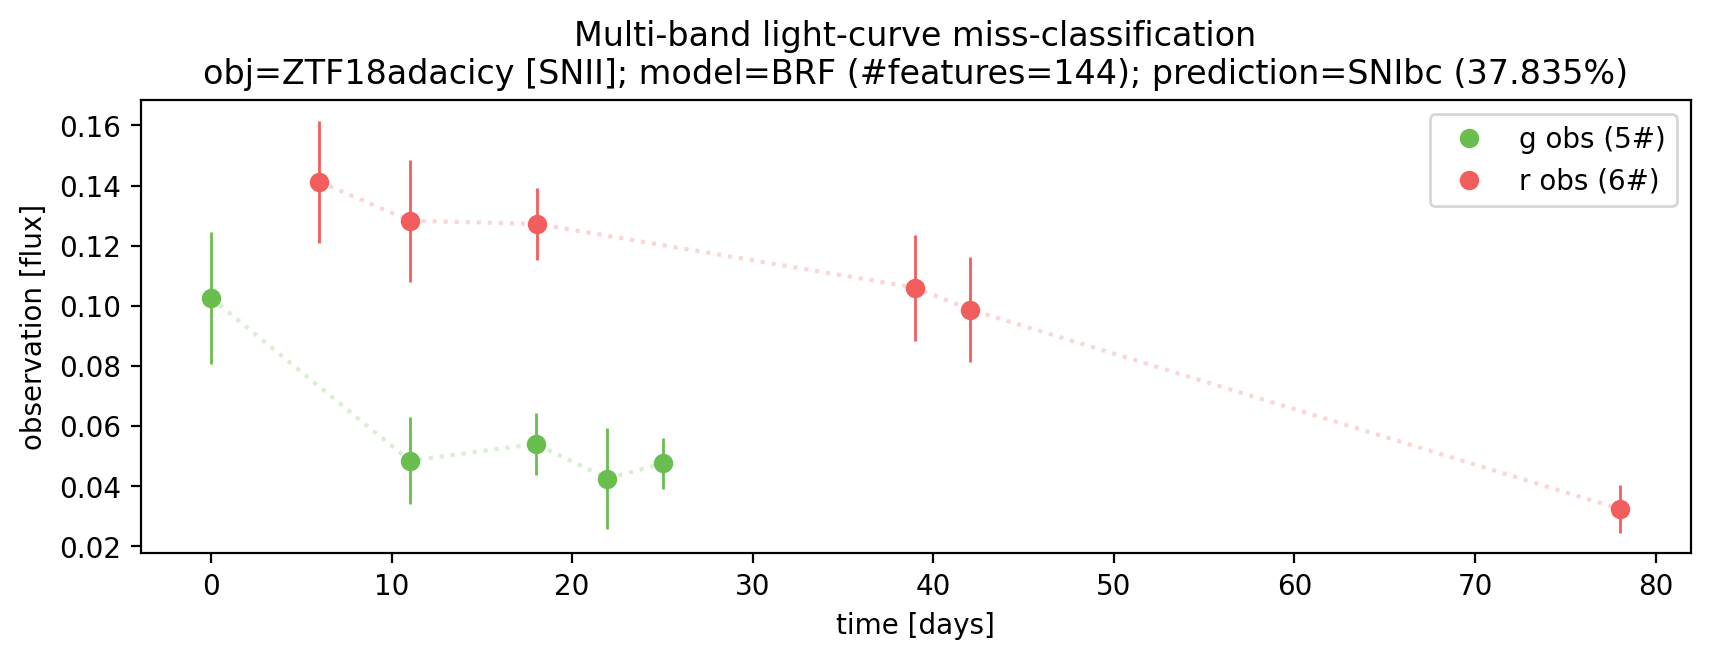

#obs=7.
#obs=8.
ZTF19aavoweu


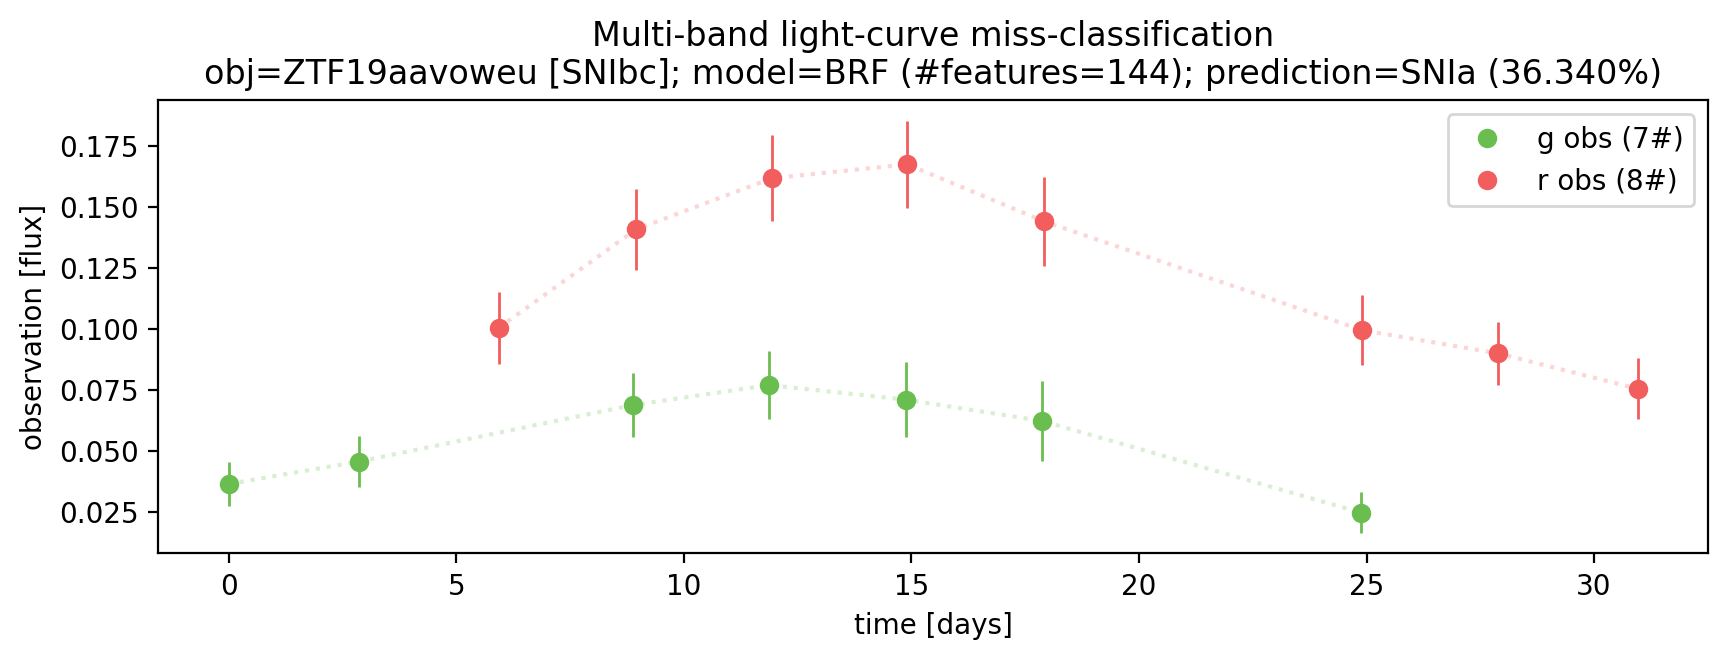

#obs=4.
#obs=10.
ZTF19acblnop


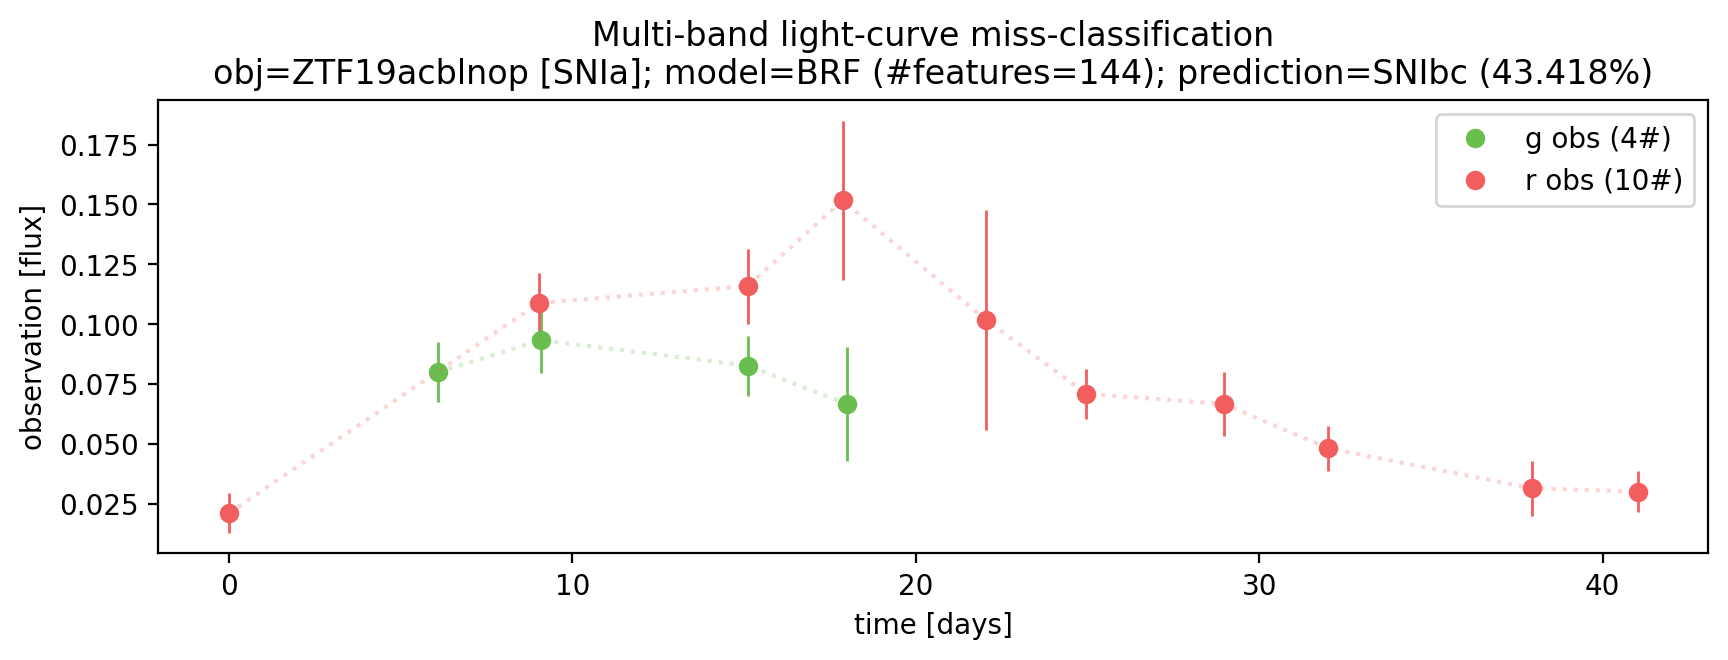

#obs=2.
#obs=7.
ZTF20aagewqr


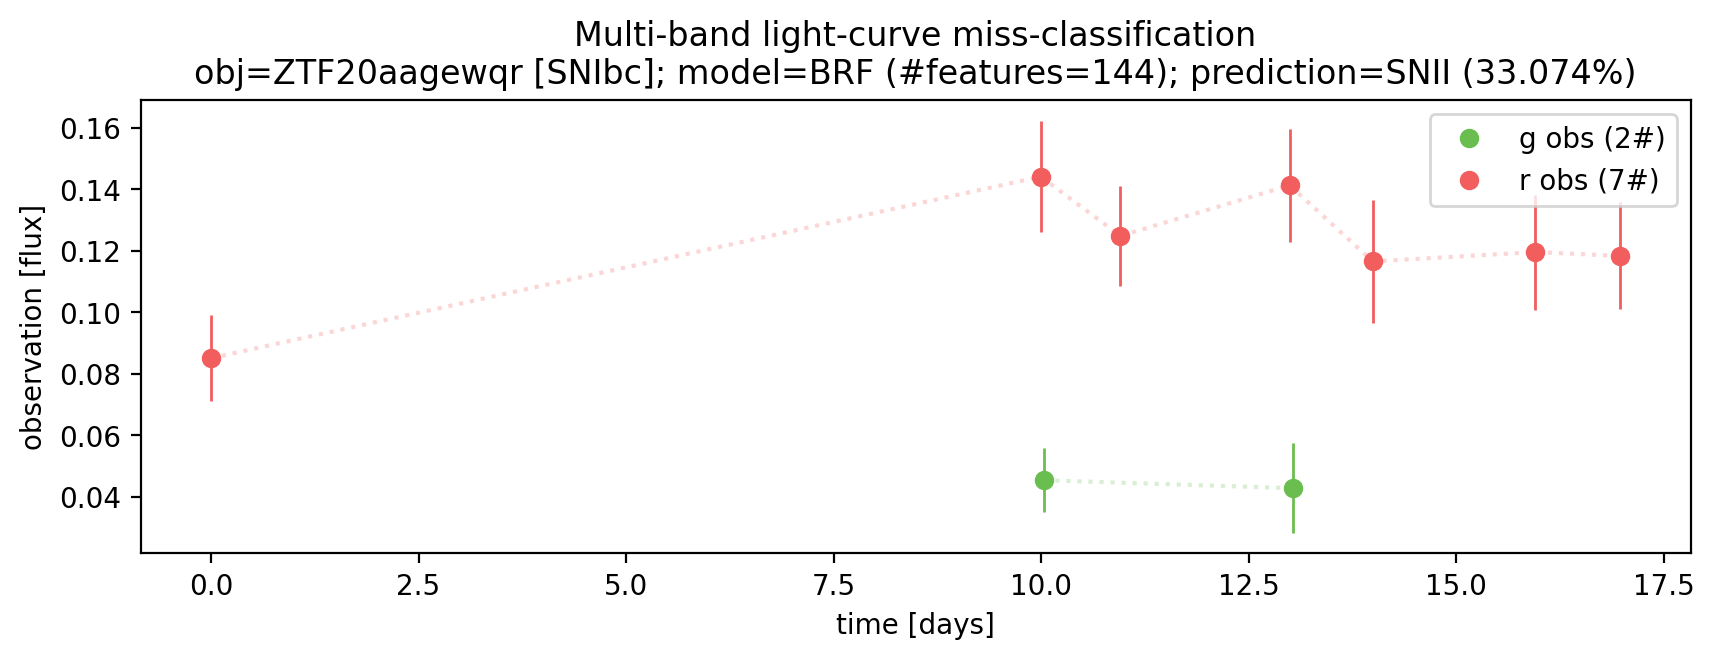

#obs=7.
#obs=15.
ZTF19aazdsgo


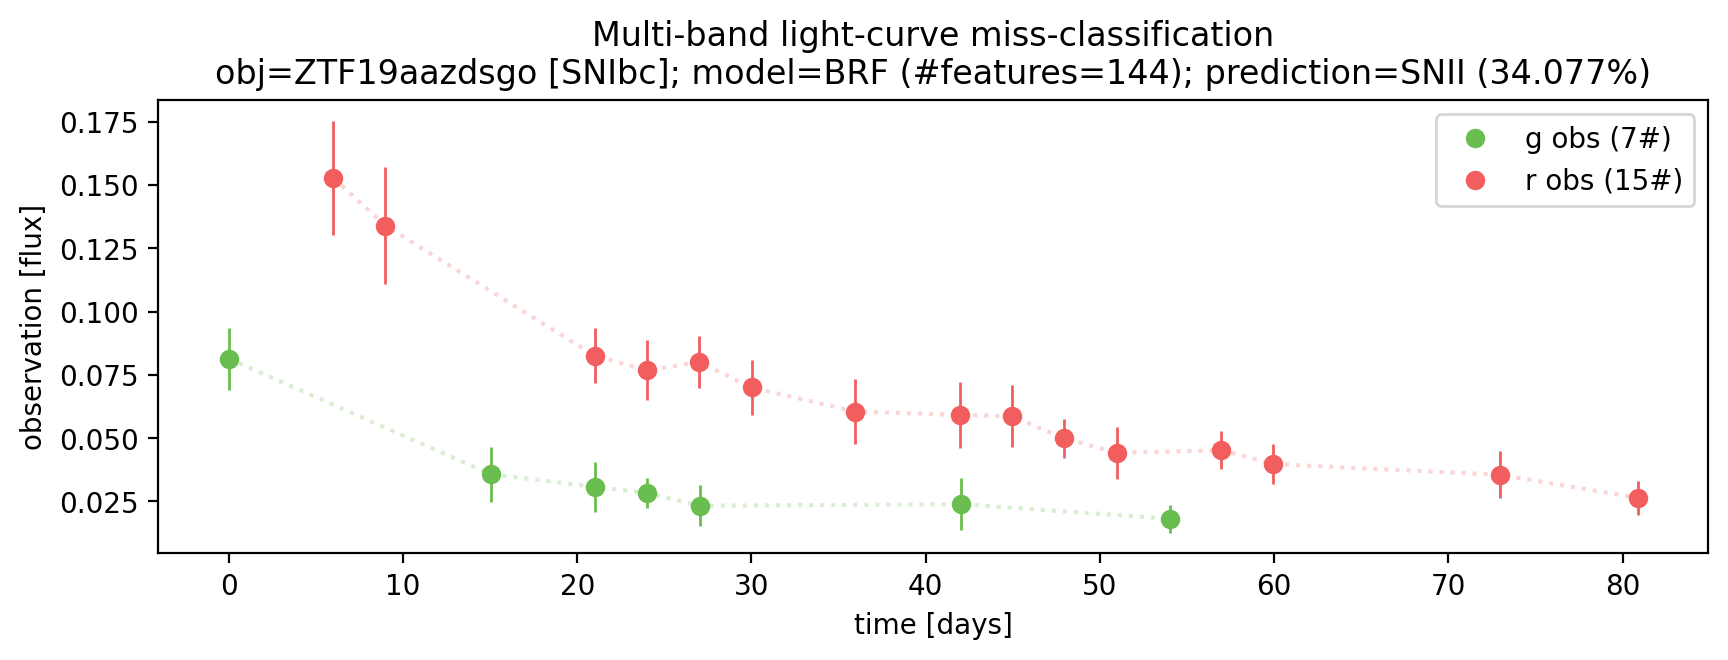

#obs=7.
#obs=12.
ZTF19acxldra


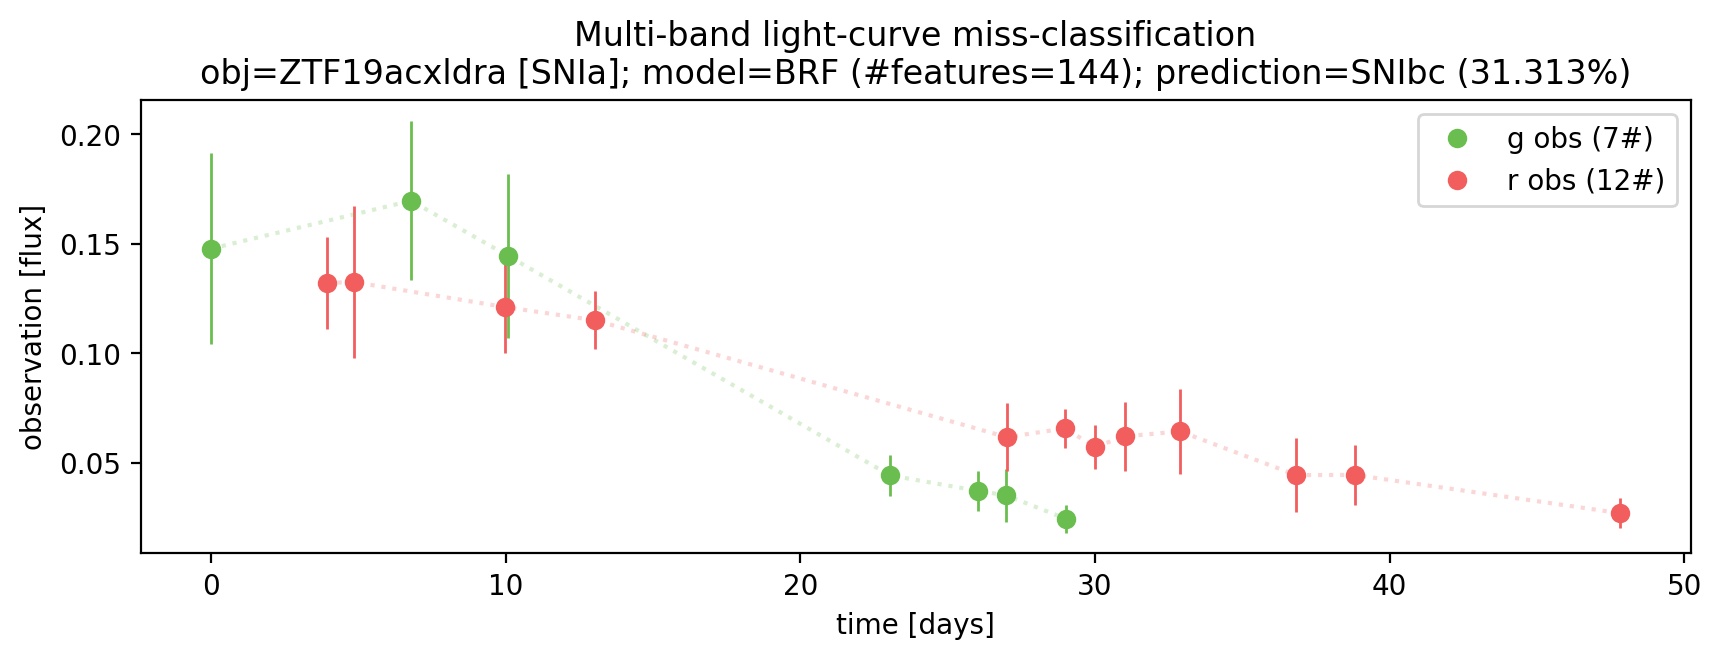

#obs=26.
#obs=28.
ZTF18abcflnz


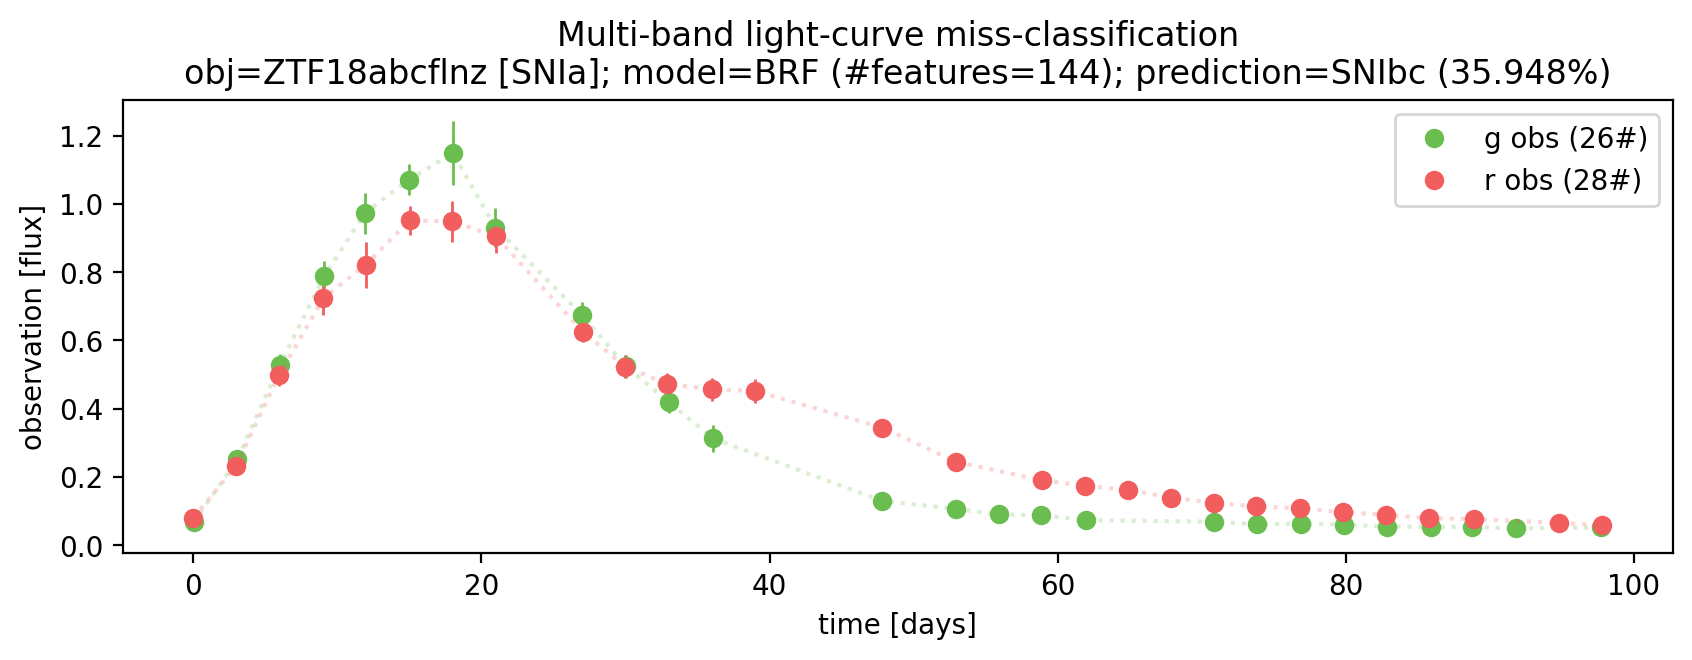

#obs=14.
#obs=28.
ZTF19aamtwiz


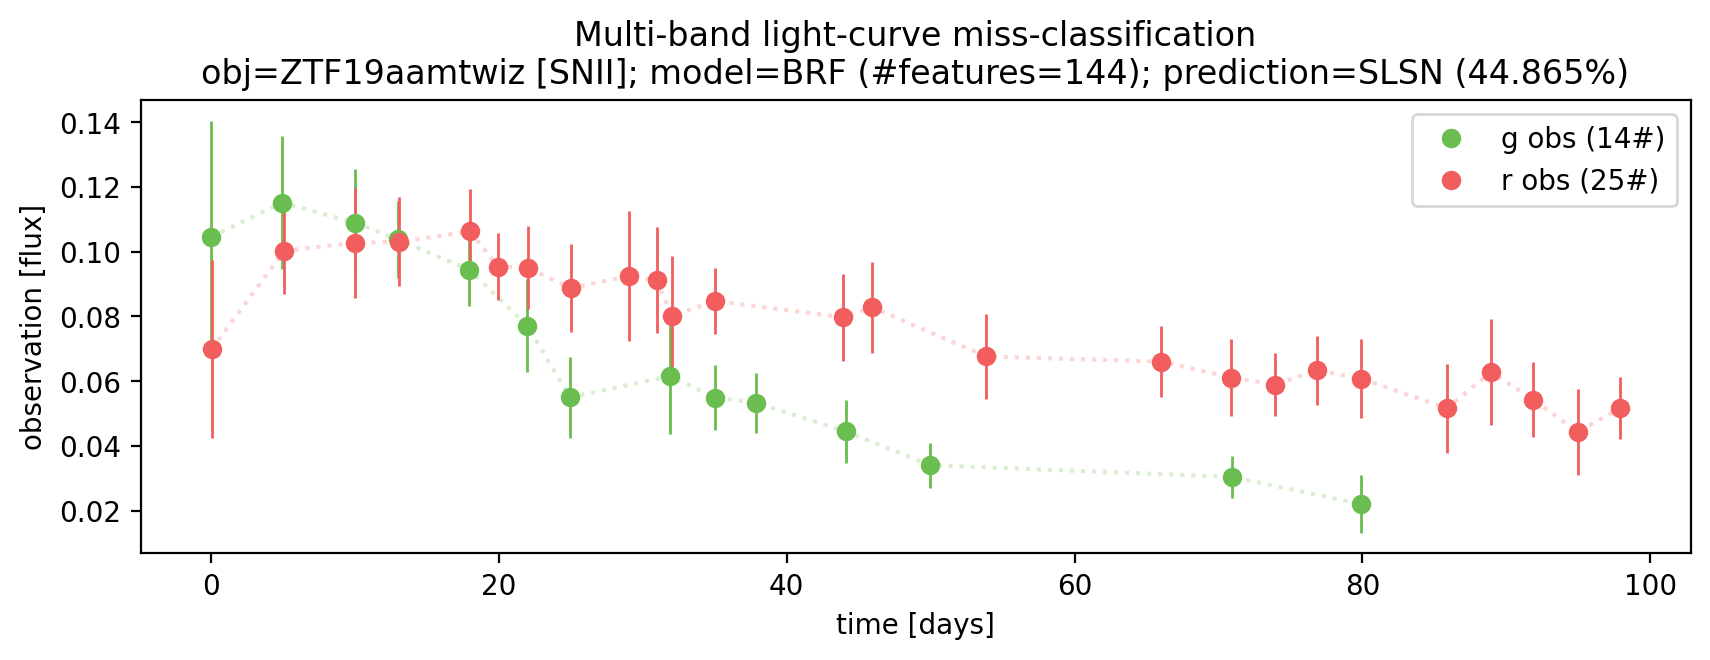

#obs=19.
#obs=22.
ZTF19adajqcq


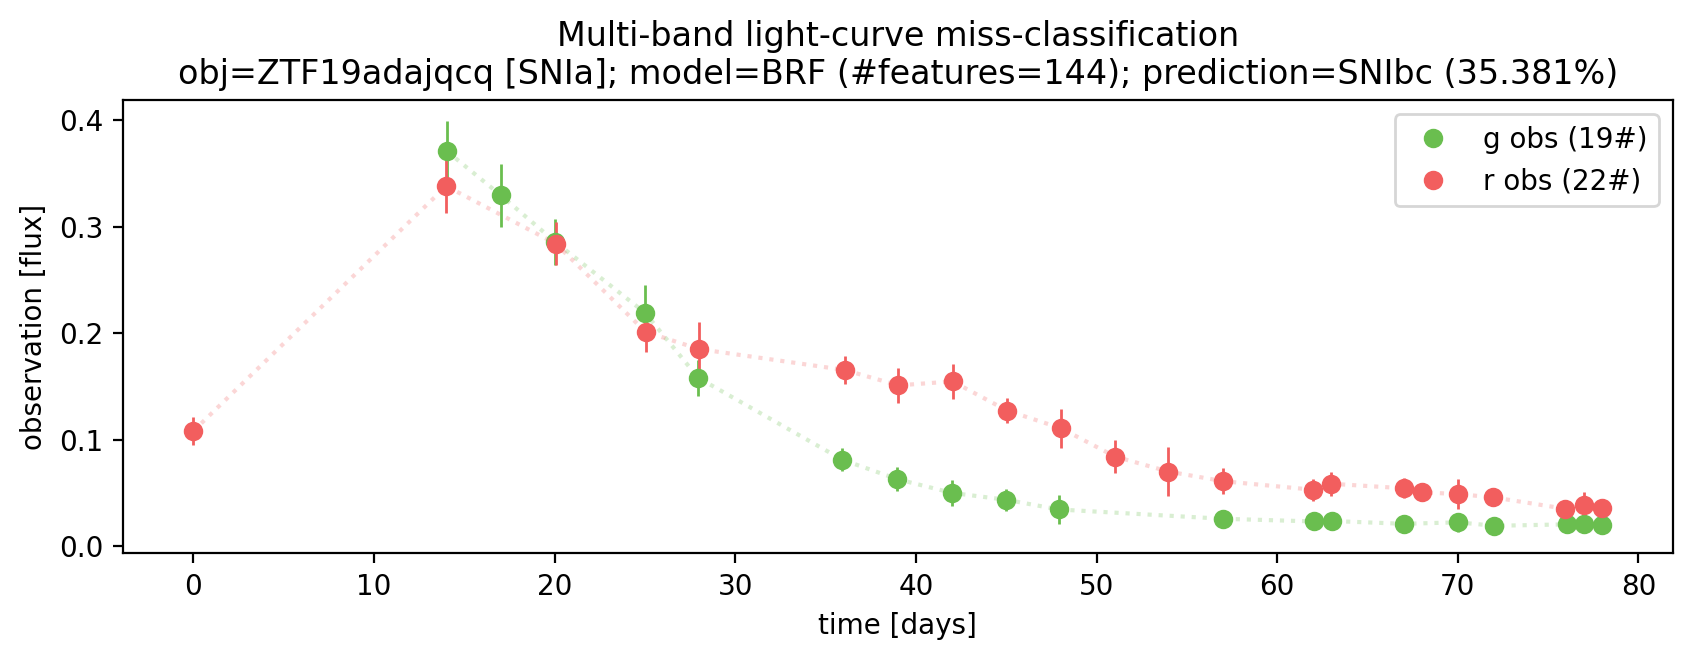

#obs=5.
#obs=9.
ZTF18acslpba


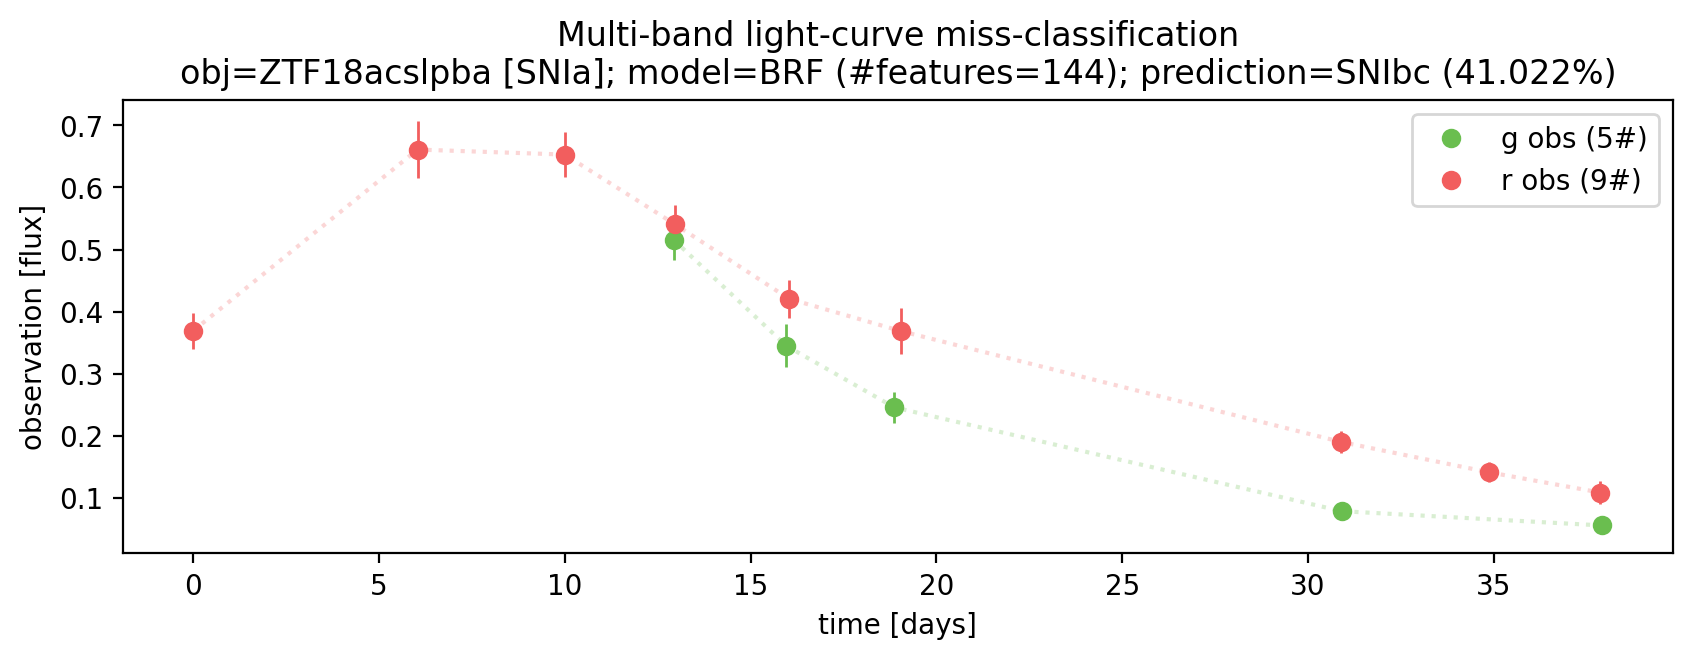

#obs=21.
#obs=25.
ZTF20aaaxacu


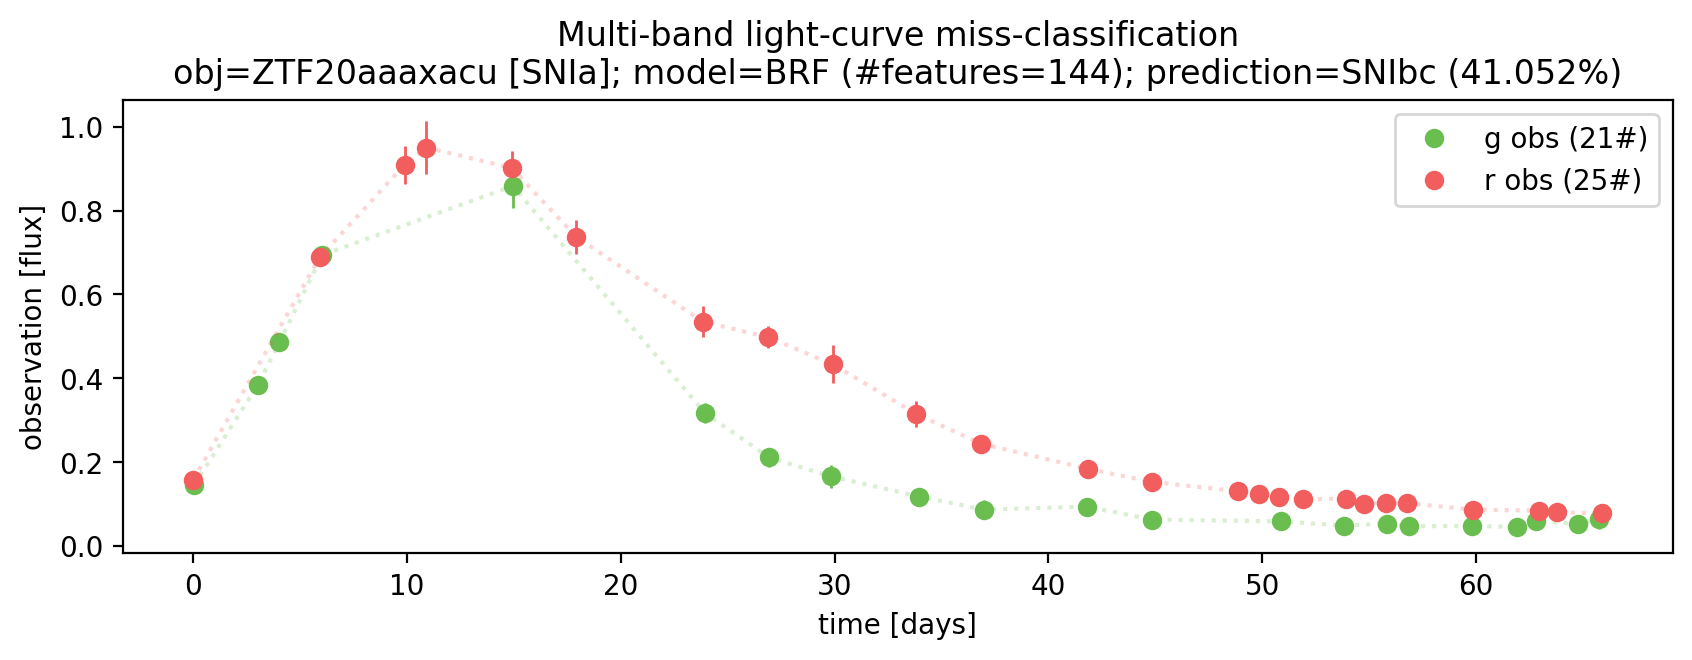

#obs=14.
#obs=13.
ZTF19acnzkph


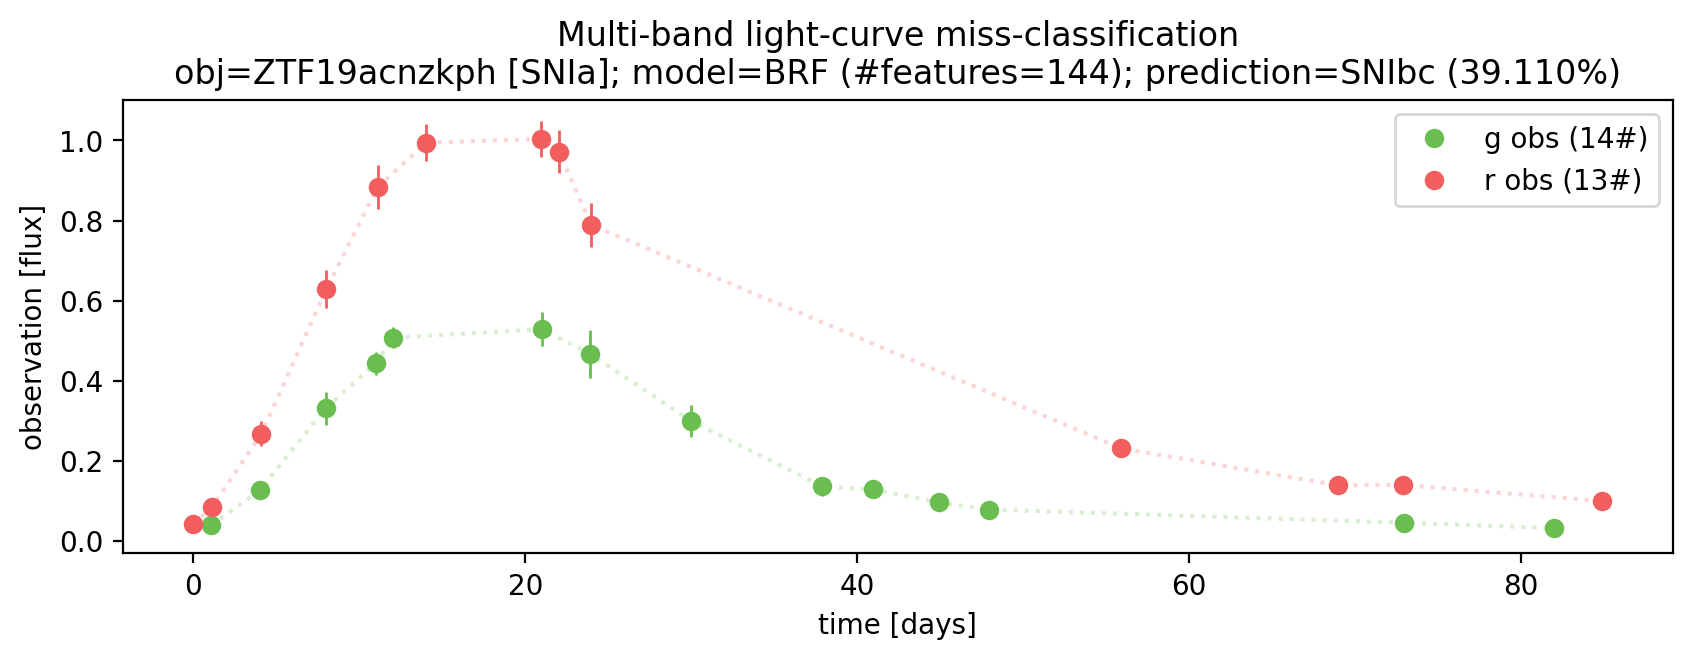

#obs=5.
#obs=6.
ZTF20aamoaim


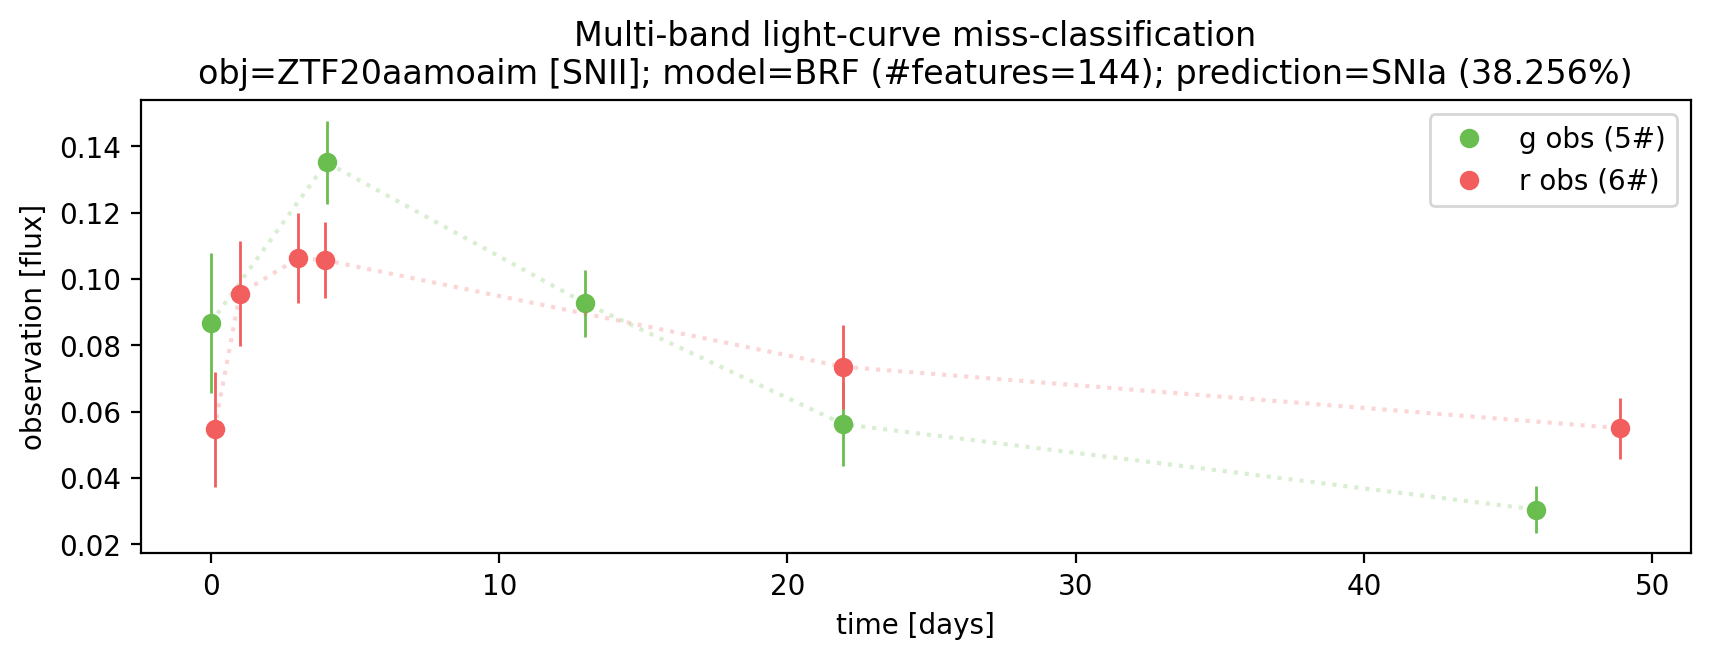

#obs=4.
#obs=7.
ZTF19acyfoha


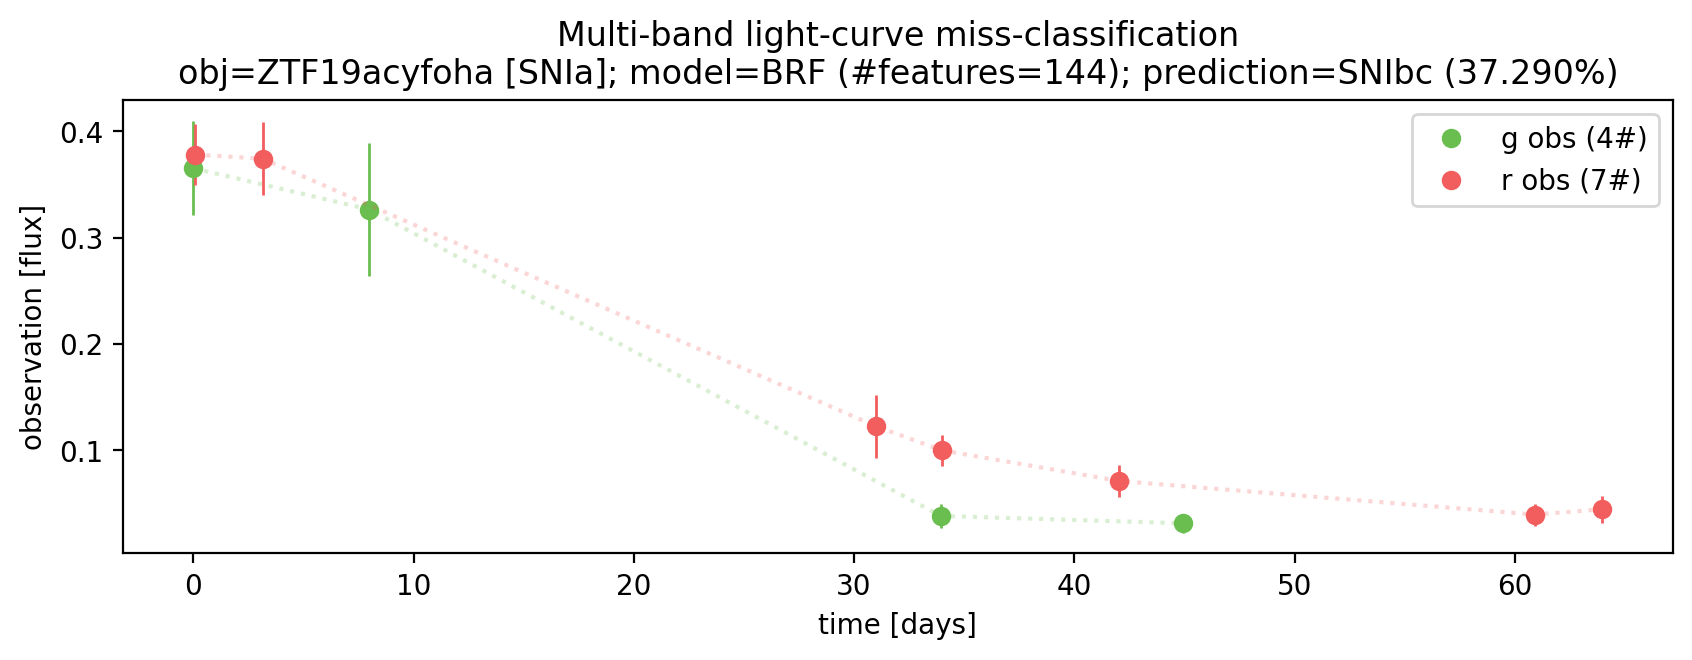

#obs=10.
#obs=17.
ZTF19acrbyzj


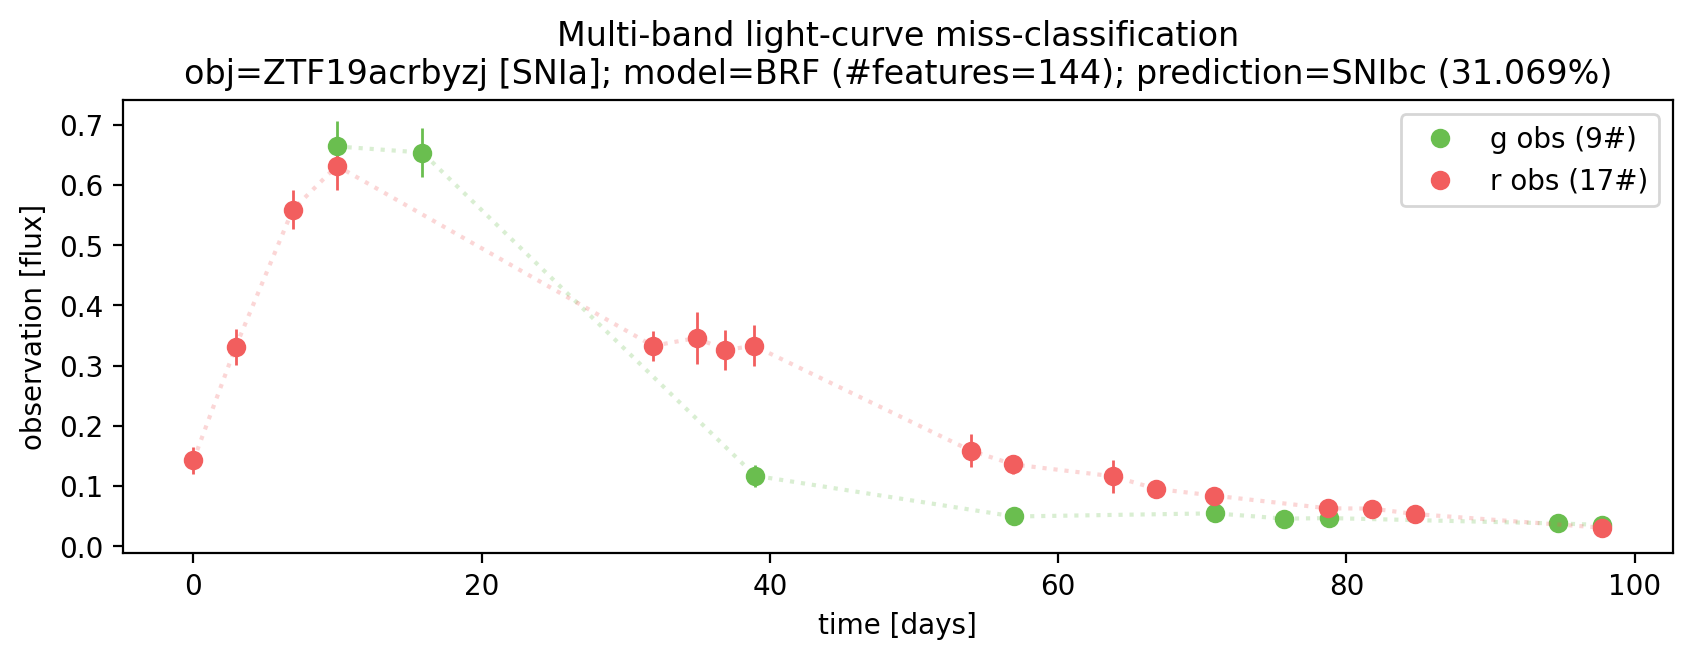

#obs=5.
#obs=11.
ZTF20aatzfin


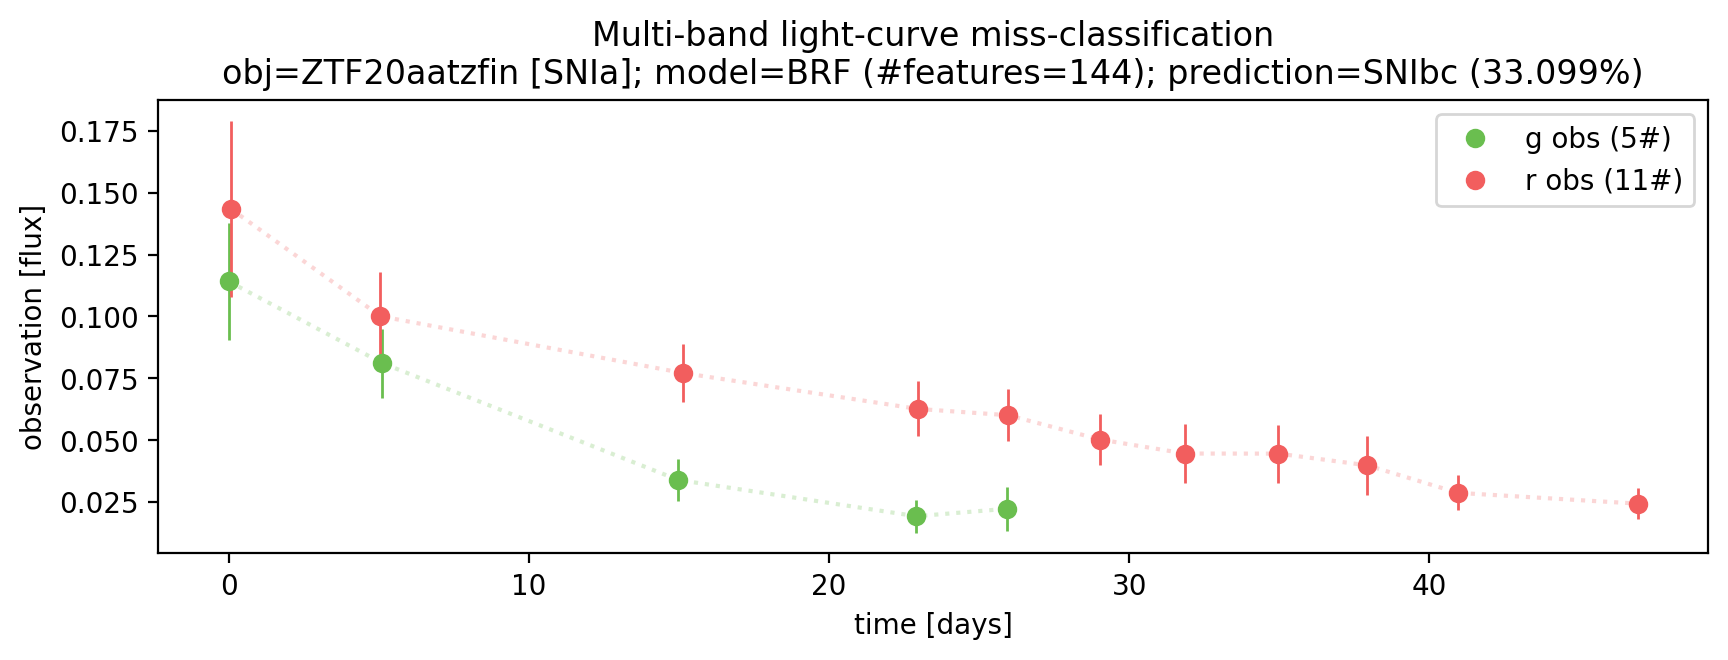

#obs=34.
#obs=47.
ZTF19abqgtqo


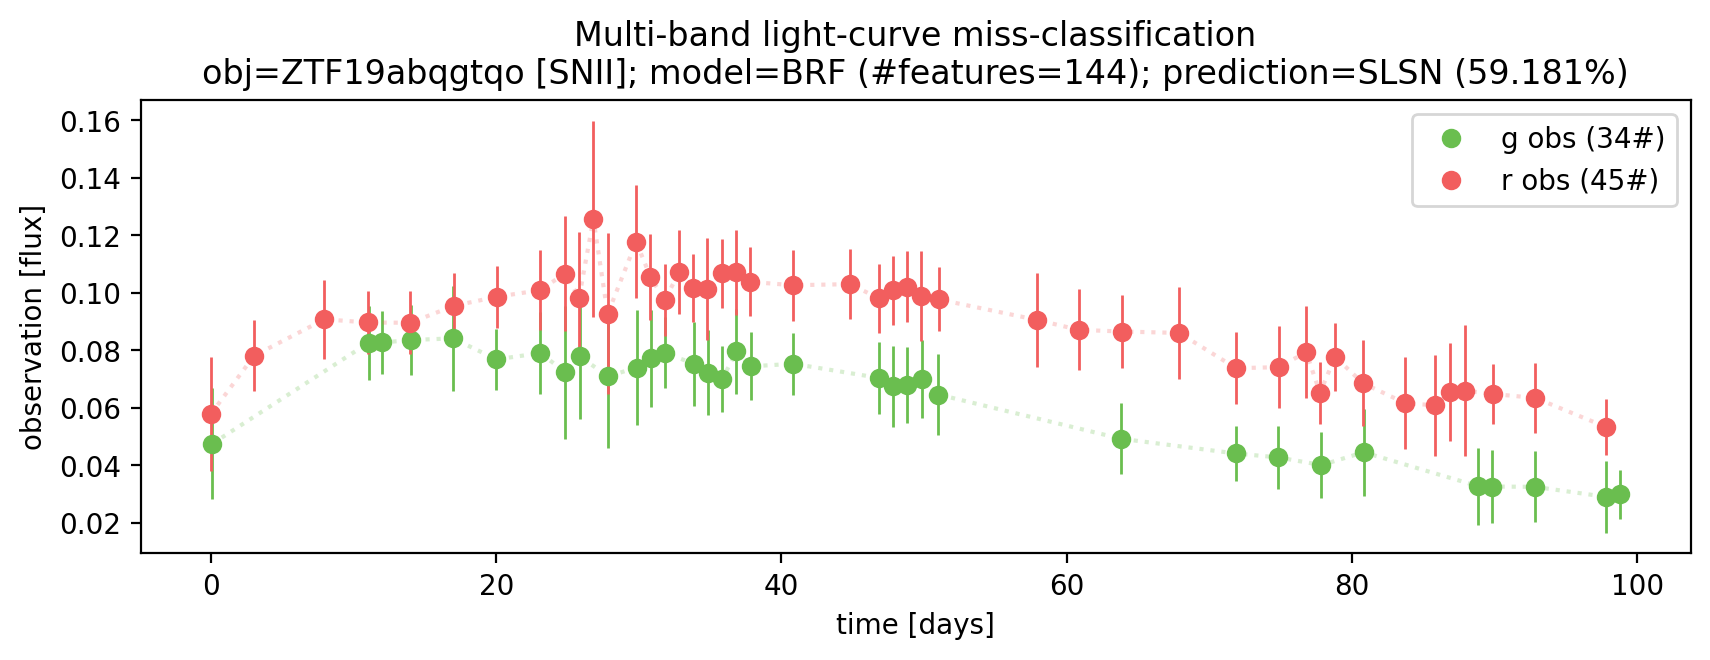

#obs=2.
#obs=8.
ZTF18acsxusq


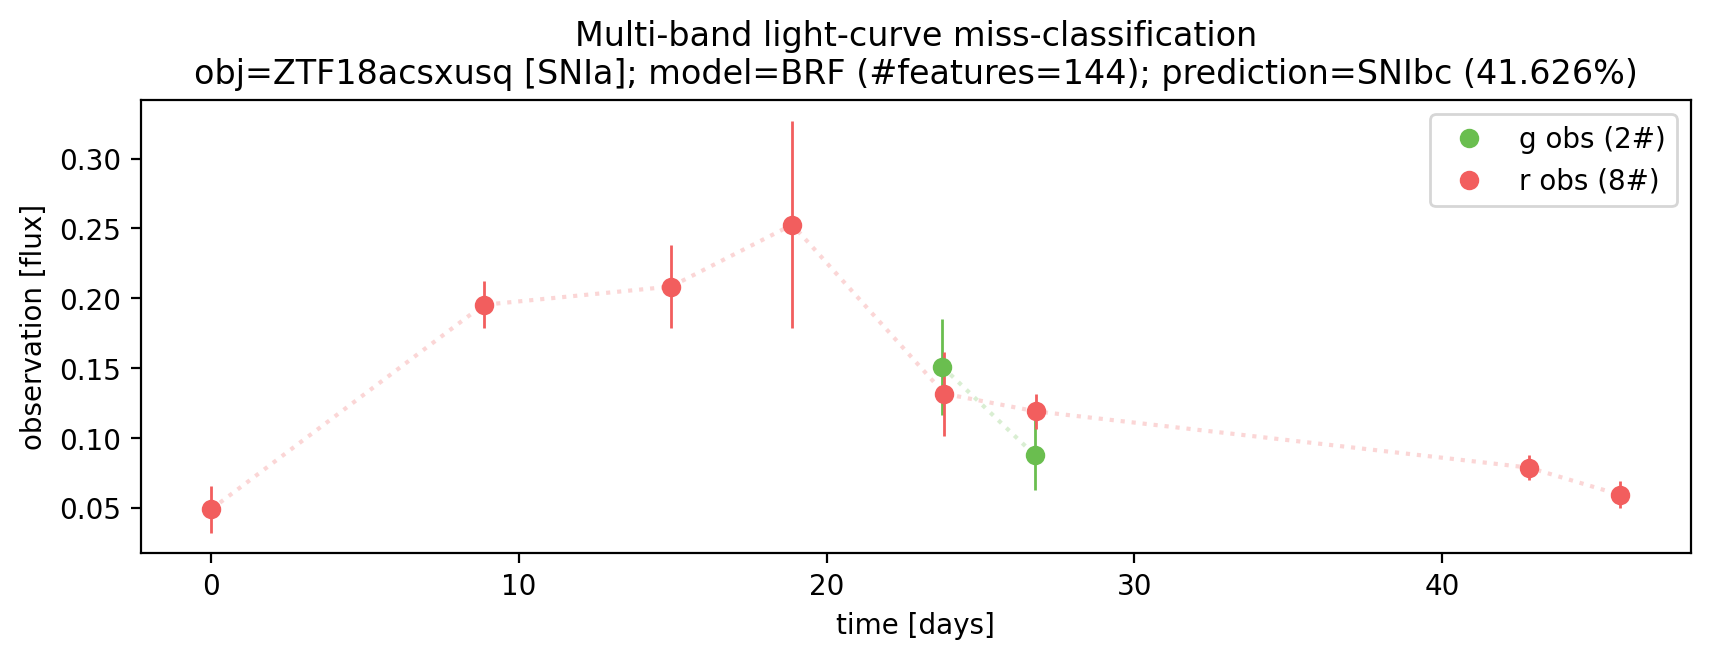

#obs=3.
#obs=8.
ZTF19achiyvy


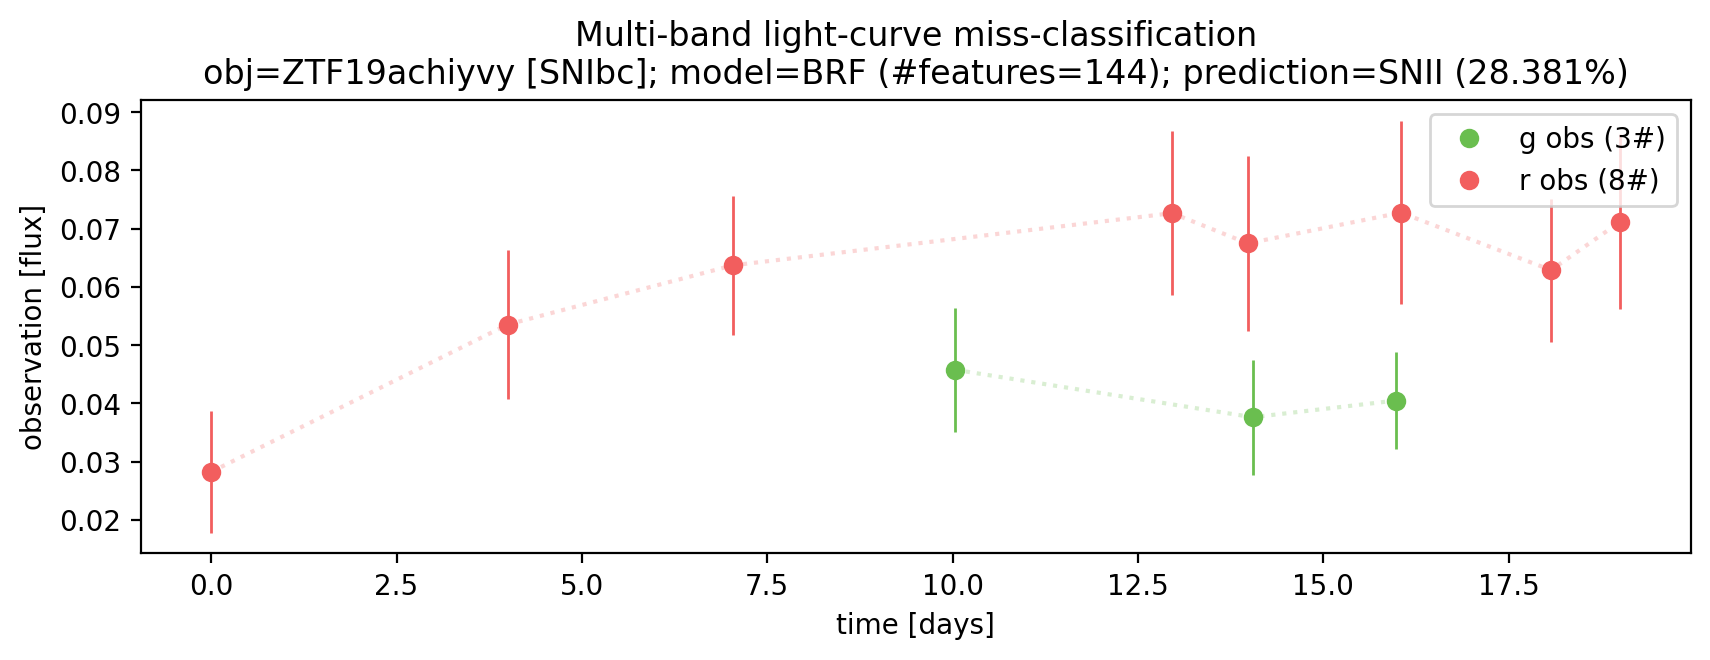

#obs=4.
#obs=8.
ZTF19aaojnrx


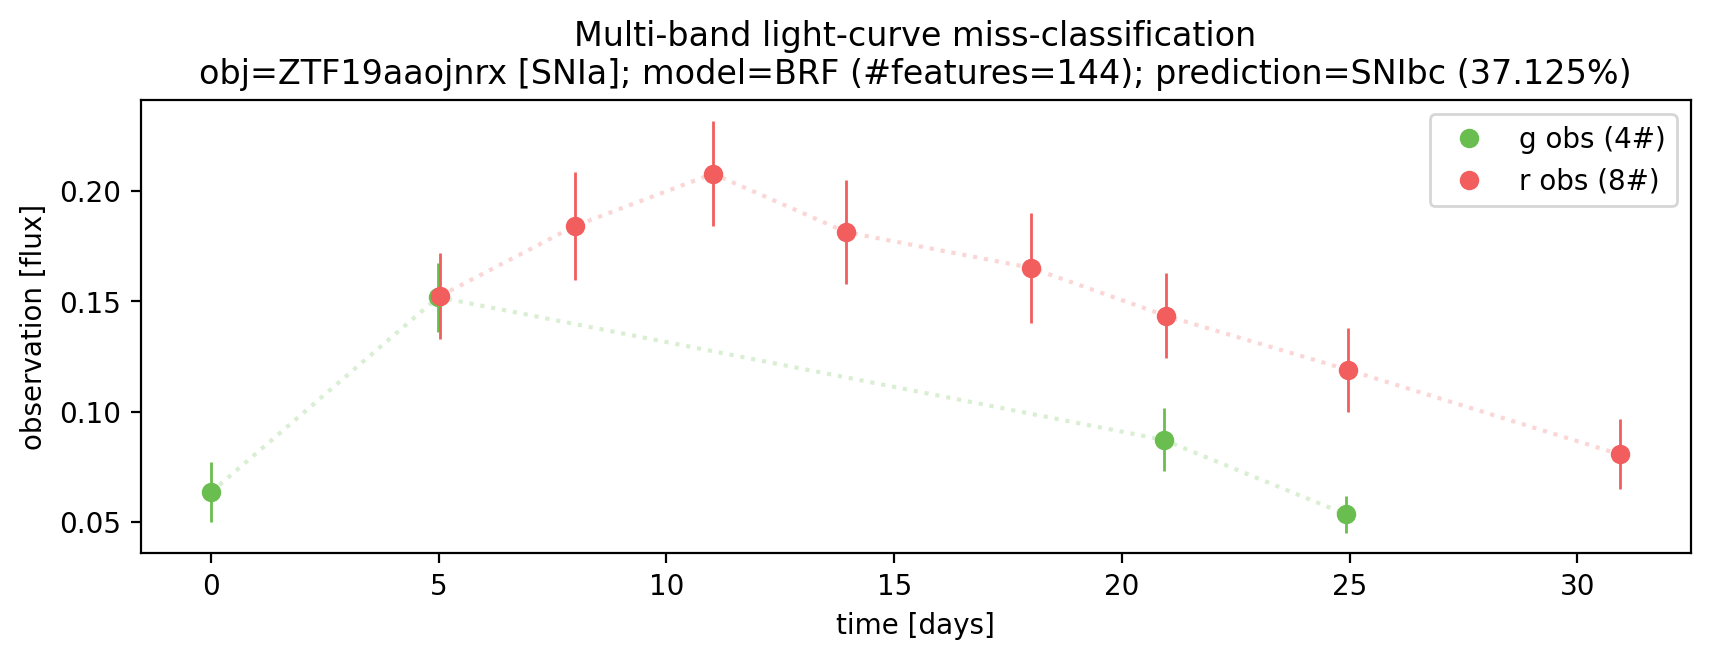

#obs=15.
#obs=20.
ZTF19abcttsc


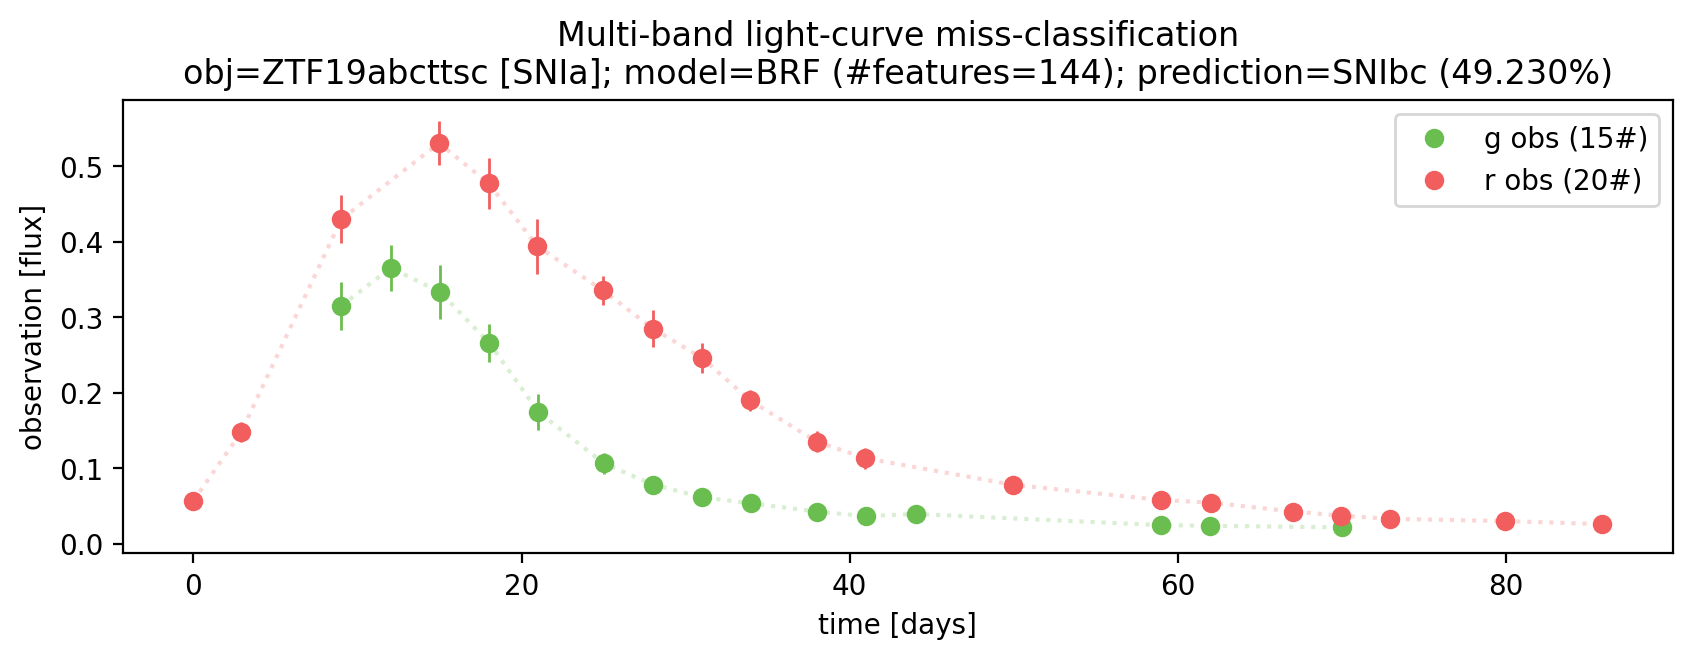

#obs=23.
#obs=31.
ZTF19aavhzsc


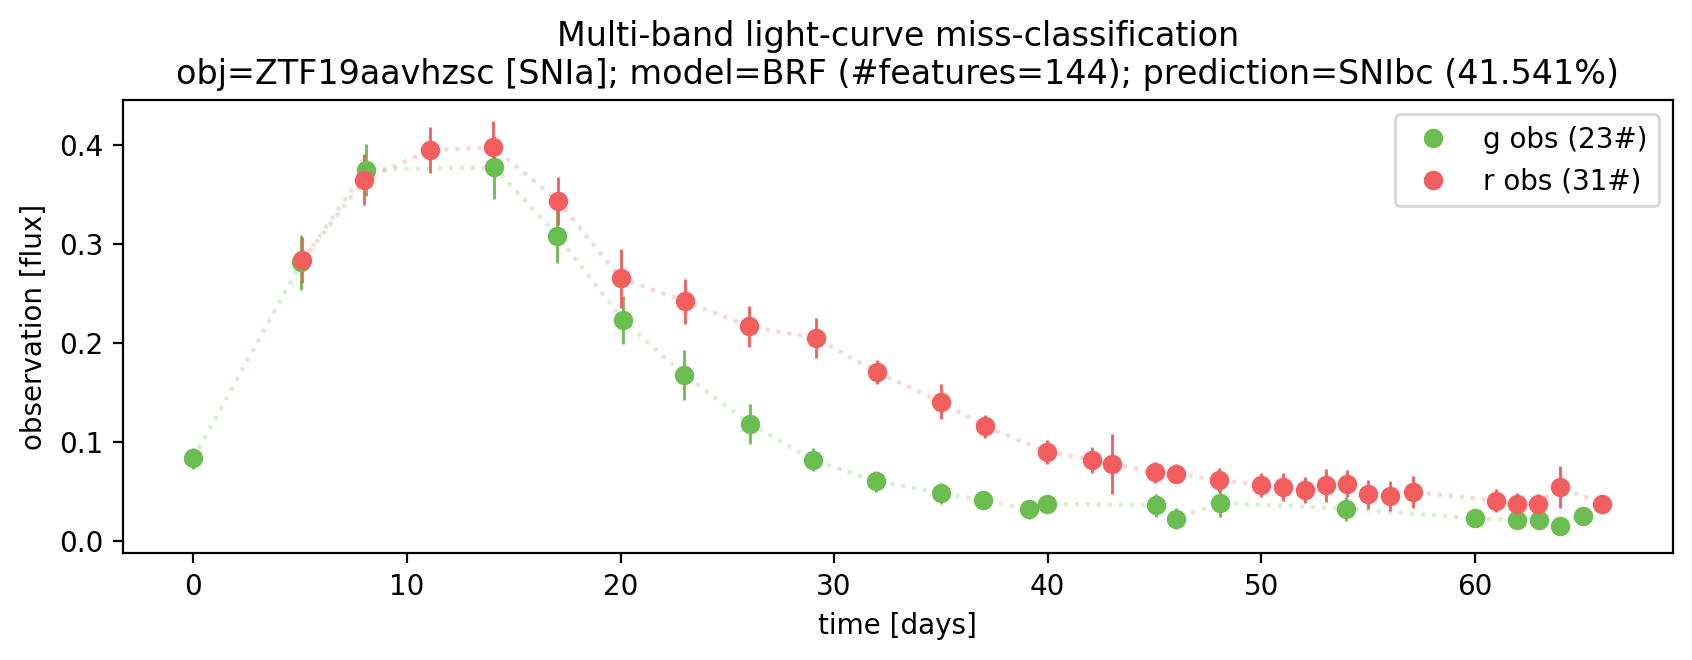

#obs=27.
#obs=37.
ZTF20aazpphd


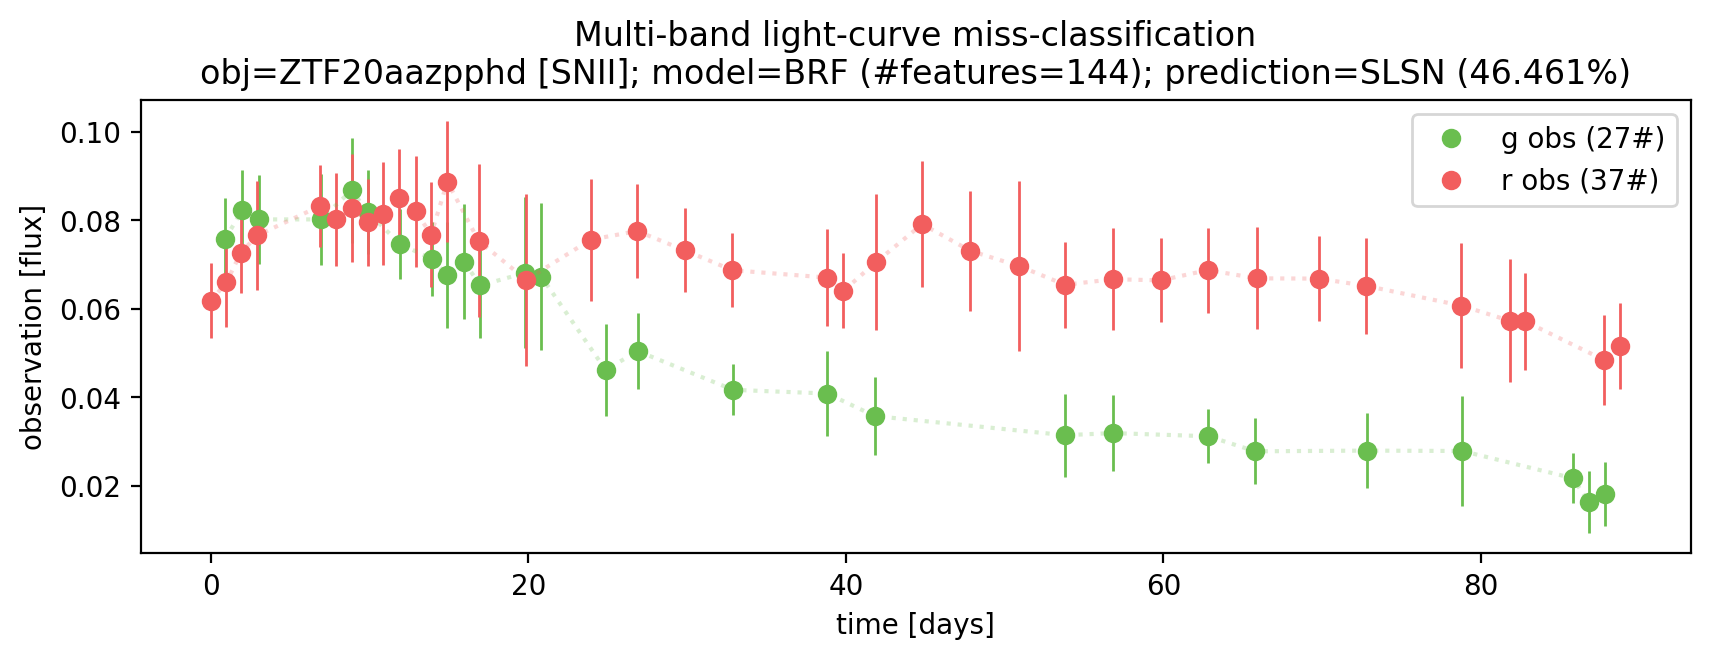

#obs=4.
#obs=9.
ZTF19aarfnto


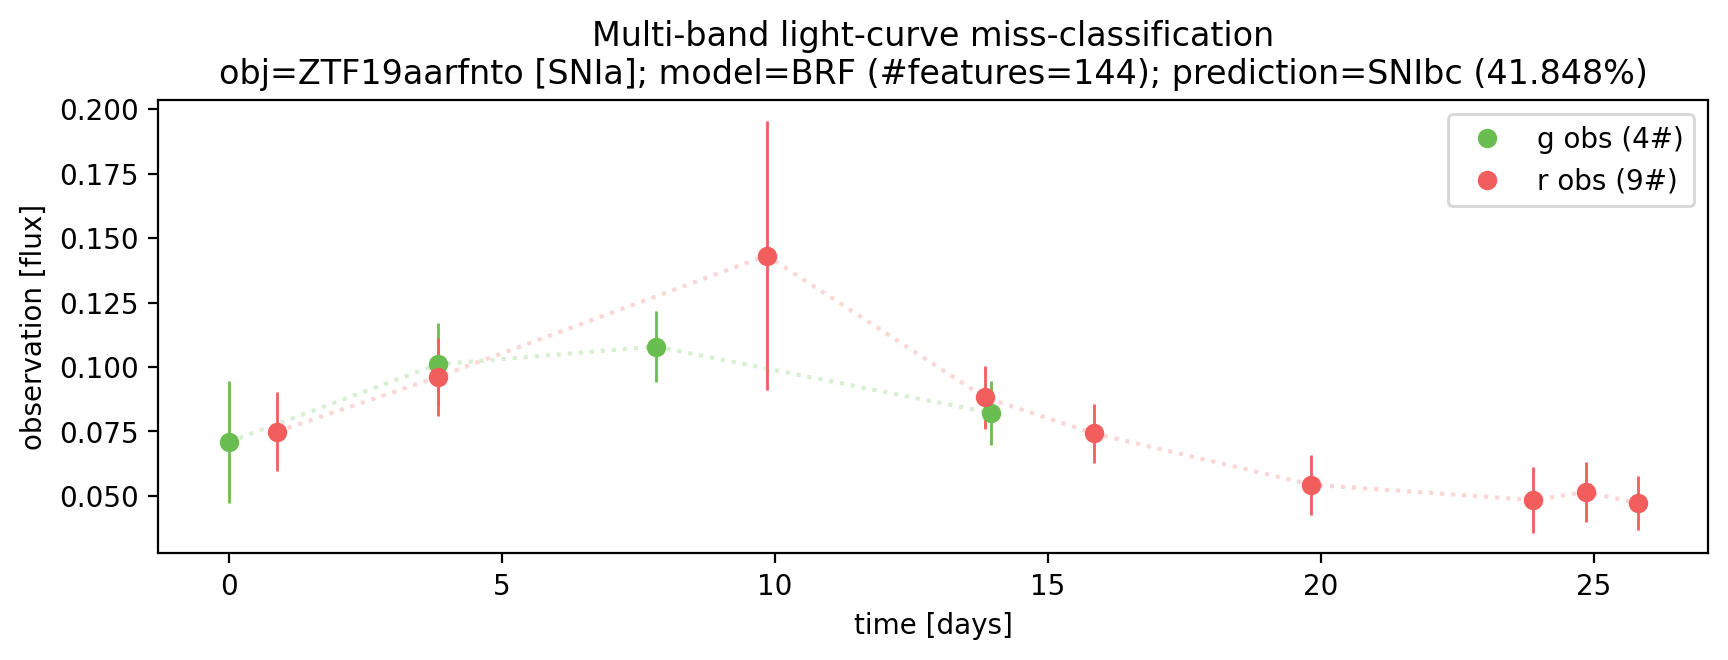

#obs=2.
#obs=6.
ZTF19aaplpaa


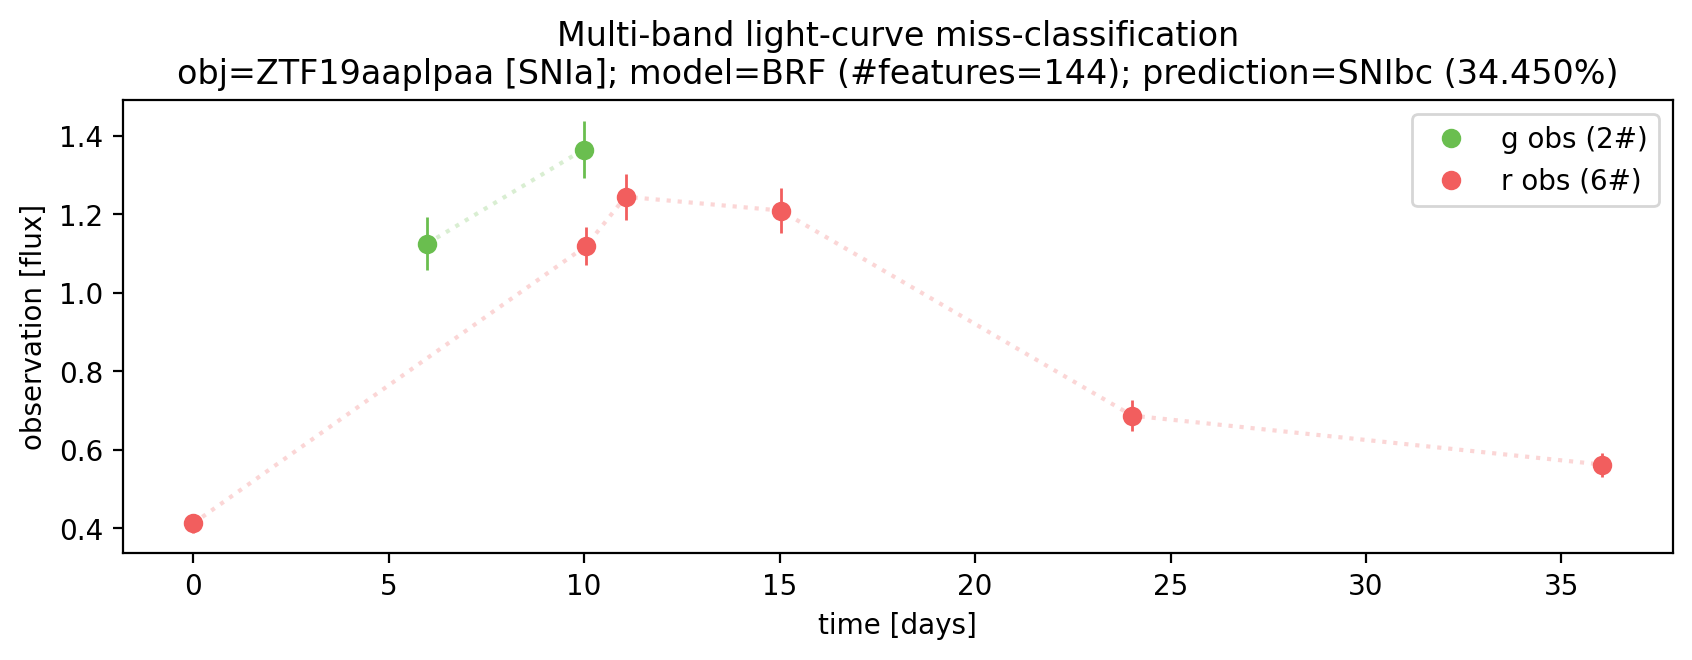

#obs=3.
#obs=9.
ZTF18acqsqry


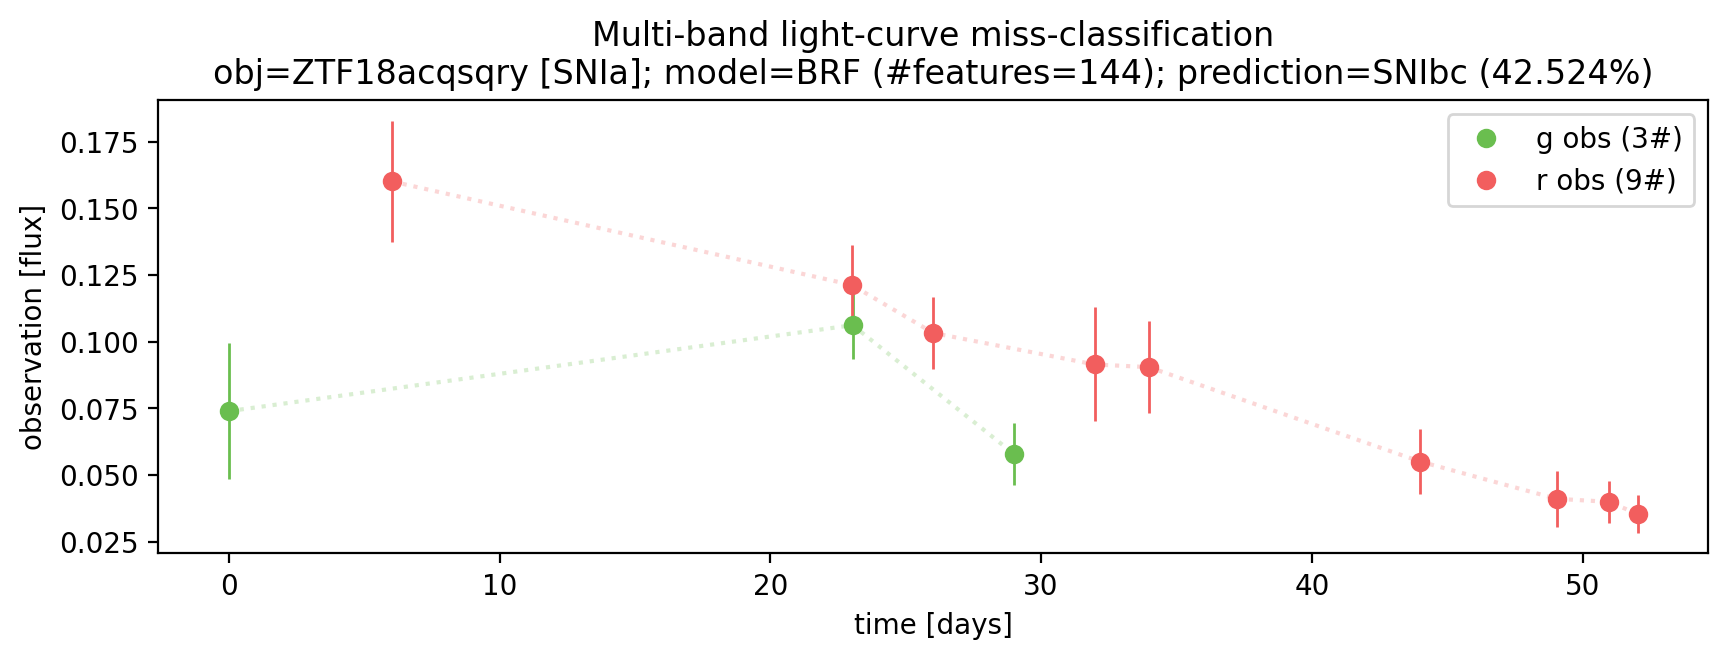

#obs=22.
#obs=33.
ZTF20aakodiq


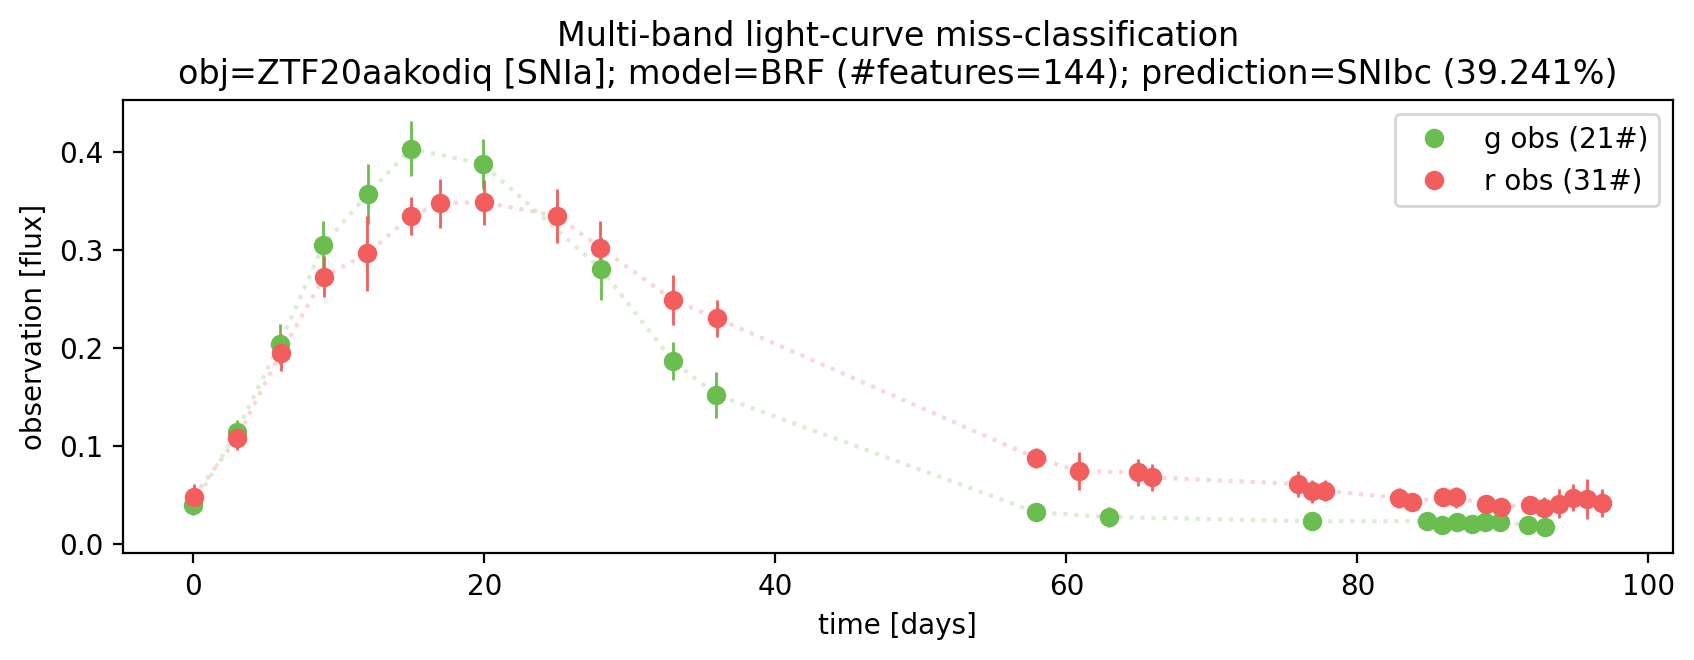

#obs=0.
#obs=12.
ZTF18abjvzxx


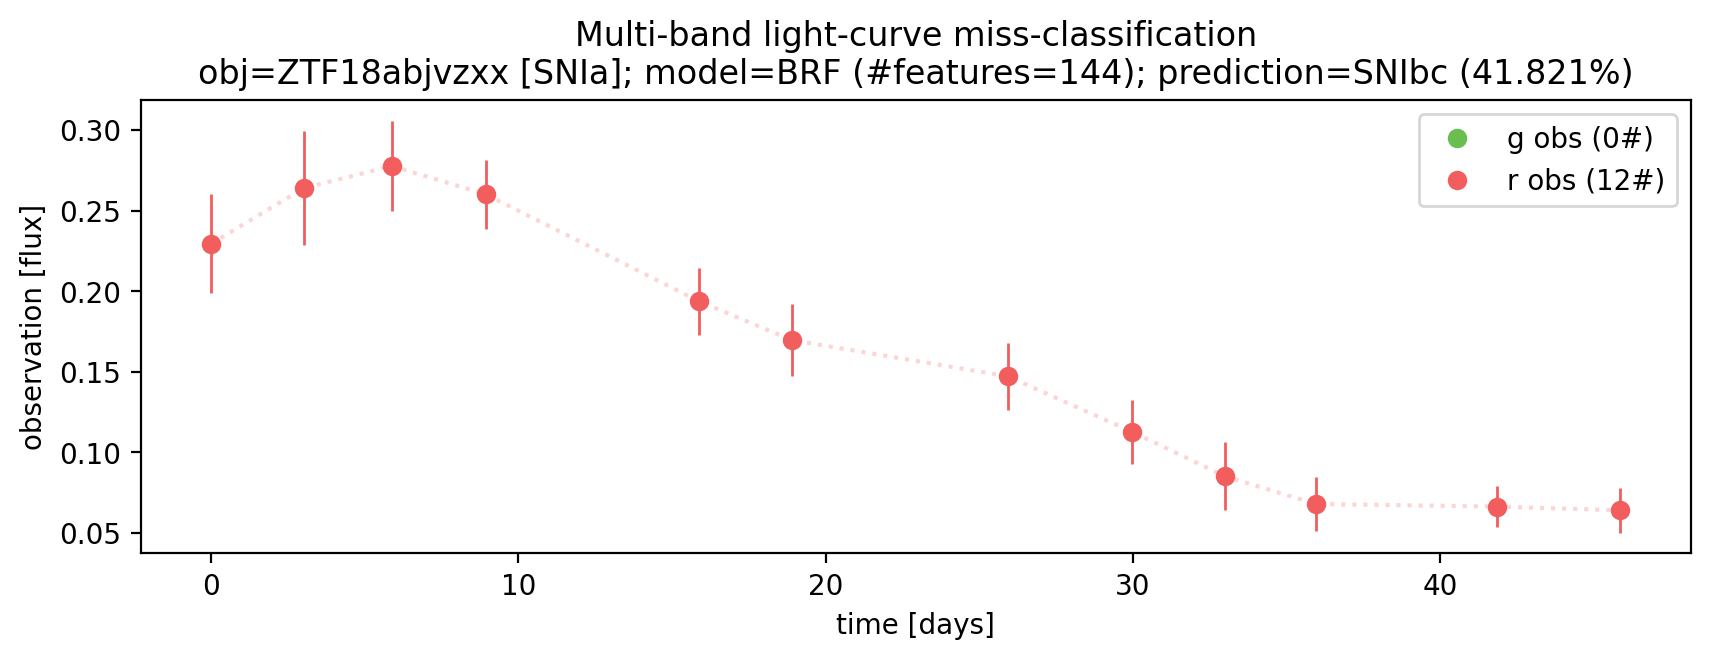

#obs=6.
#obs=8.
ZTF18acbwxgn


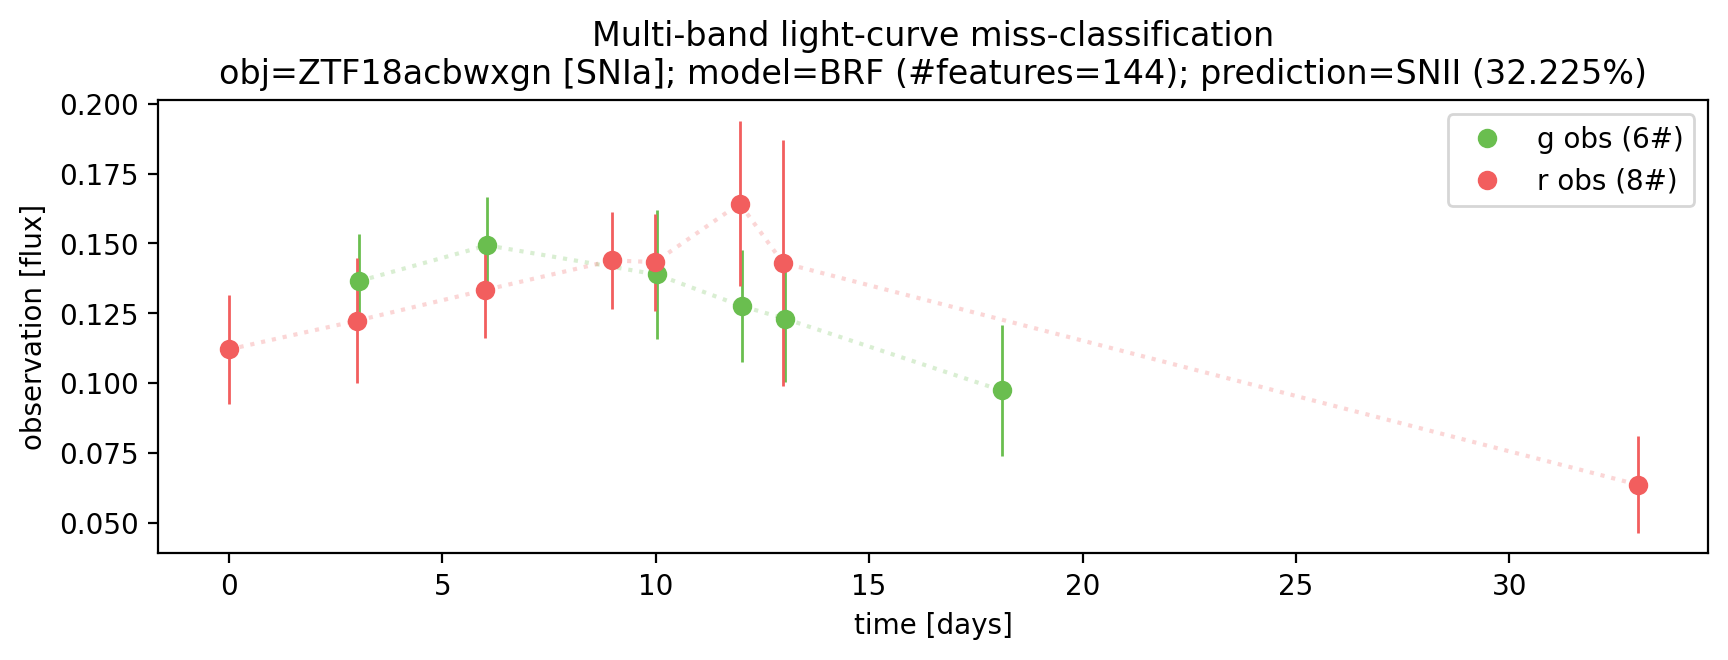

#obs=5.
#obs=11.
ZTF18abmoung


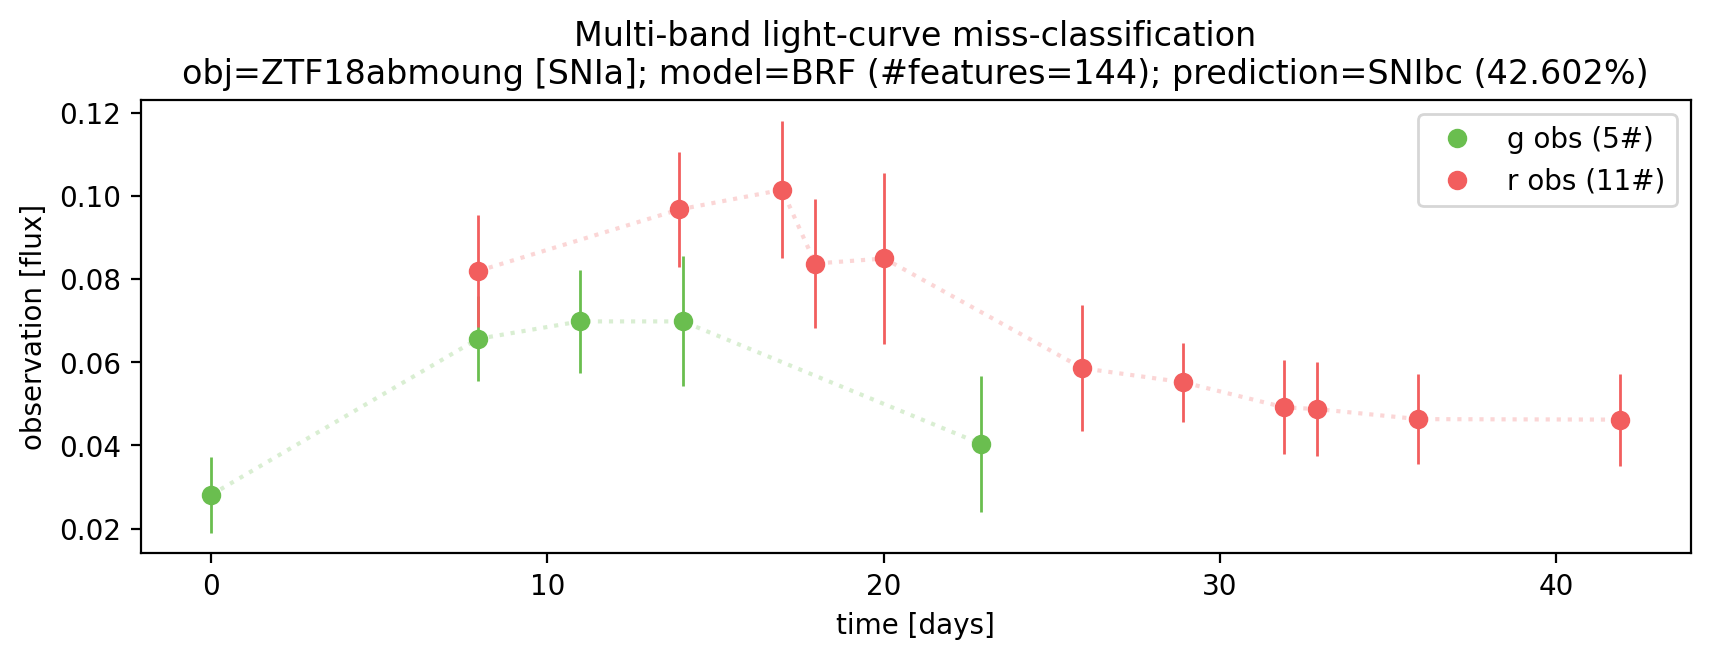

#obs=0.
#obs=24.
ZTF18abscyjj


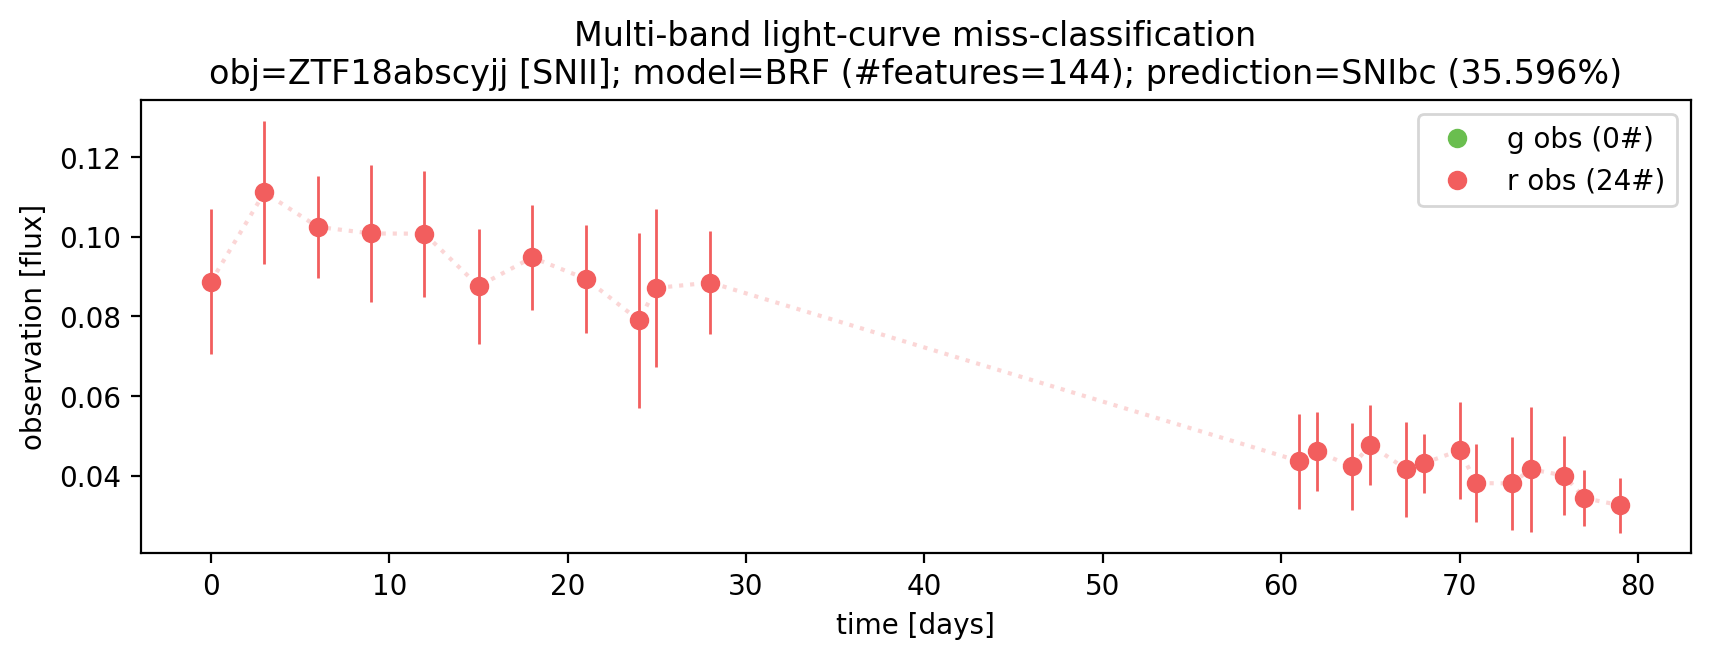

In [32]:
%load_ext autoreload
%autoreload 2
from copy import copy, deepcopy
from lchandler.plots.lc import plot_lightcurve
import matplotlib.pyplot as plt

model_name = f'BRF (#features=144)'

for miss_obj_id in list(set(brf_miss_obj_ids+deep_miss_obj_ids)):
    #if miss_obj_id in brf_miss_obj_ids and miss_obj_id in deep_miss_obj_ids: # both
    if miss_obj_id in brf_miss_obj_ids and not miss_obj_id in deep_miss_obj_ids: # only brf
        figsize = (10, 3)
        dpi = 200
        fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
        lcobj = lcdataset['raw'][miss_obj_id]
        for b in lcobj.bands:
            print(f'#obs={len(lcobj.get_b(b))}.')
            plot_lightcurve(ax, lcobj, b, label=f'{b} obs',
                max_day=thday,
                )
        ax.legend()
        d = brf_miss_objs_df.loc[[miss_obj_id]].to_dict(orient='index')[miss_obj_id]
        title = ''
        title += f'Multi-band light-curve misclassification'+'\n'
        c = d['c'].replace('*', '')
        obj_y_pred_c = d['obj_y_pred_c'].replace('*', '')
        title += f'obj={miss_obj_id} [{c}]; model={model_name}; prediction={obj_y_pred_c} ({d["obj_y_pred_p"]*100:.3f}%)'+'\n'
        ax.set_title(title[:-1])
        ax.set_xlabel('time [days]')
        ax.set_ylabel('observation [flux]')
        ax.grid(alpha=.0)
        print(miss_obj_id)
        plt.show()